<a href="https://colab.research.google.com/github/ankxl/2022_869_AnkitRai_IndividualAssignment/blob/main/MMA_2022W_869_Individual_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMA 869: Individual Assignment

<font color='red'>\# TODO: fill in the below</font>

- ANKIT RAI
- 20254135
- SECTION II
- What The Ceo Really Wants From You by R Gopalakrishnan 
- 9 AUGUST 2021

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python. You may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and scipy`.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
print(datetime.datetime.now())

2021-08-16 02:47:29.917297


In [3]:
!which python

/usr/local/bin/python


In [4]:
!python --version

Python 3.7.11


In [5]:
!echo $PYTHONPATH

/env/python


In [6]:
# TODO: install any packages you need to here. For example:
#pip install unidecode


# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every single posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a winner and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descripive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.


## 1.0: Load data 

In [7]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


## 1.1: Clustering Algorithm #1

In [8]:
pip install yellowbrick

In [9]:
pip install kmodes

In [10]:
#import relevant modules
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer

from kmodes.kmodes import KModes
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 10000)
pd.set_option('max_rows', 99999)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
# Analyse the data before processing

df1.info()
df1.describe()
df1.head(10)
df1.isna().sum()

#There are no missing values in the dataset. We can start analysing the data for outliers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


Age         Income  SpendingScore       Savings
count  505.000000     505.000000     505.000000    505.000000
mean    59.019802   75513.291089       0.505083  11862.455867
std     24.140043   35992.922184       0.259634   4949.229253
min     17.000000   12000.000000       0.000000      0.000000
25%     34.000000   34529.000000       0.304792   6828.709702
50%     59.000000   75078.000000       0.368215  14209.932802
75%     85.000000  107100.000000       0.768279  16047.268331
max     97.000000  142000.000000       1.000000  20000.000000

Age  Income  SpendingScore       Savings
0   58   77769       0.791329   6559.829923
1   59   81799       0.791082   5417.661426
2   62   74751       0.702657   9258.992965
3   59   74373       0.765680   7346.334504
4   87   17760       0.348778  16869.507130
5   29  131578       0.847034   3535.514352
6   54   76500       0.785198   6878.884249
7   87   42592       0.355290  18086.287158
8   83   34384       0.324719  14783.379086
9   84   27693       0.367063  17879.558906

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

Text(0.5, 1.0, 'Age Boxplot')

{'boxes': [<matplotlib.lines.Line2D at 0x7fbffe76a690>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbffe6f56d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbffe7c68d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbffe6fc1d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc013bc8990>,
  <matplotlib.lines.Line2D at 0x7fbffe6f5190>]}

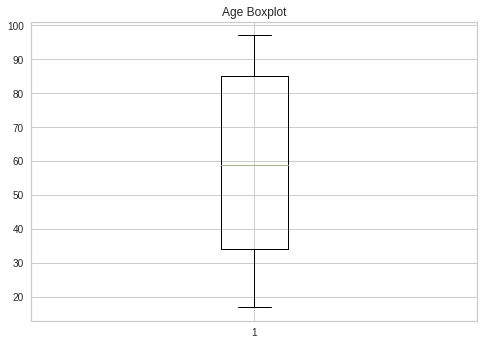

In [12]:
#Plot boxplot to better understand data and map outliers, if any.
# Boxplot for Age
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax3 = plt.subplots()
ax3.set_title('Age Boxplot')
ax3.boxplot(df1.Age, flierprops=green_diamond)



Text(0.5, 1.0, 'Income Boxplot')

{'boxes': [<matplotlib.lines.Line2D at 0x7fbffe258550>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbffe25c610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbffe260650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbffe260050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbffe258b10>,
  <matplotlib.lines.Line2D at 0x7fbffe258050>]}

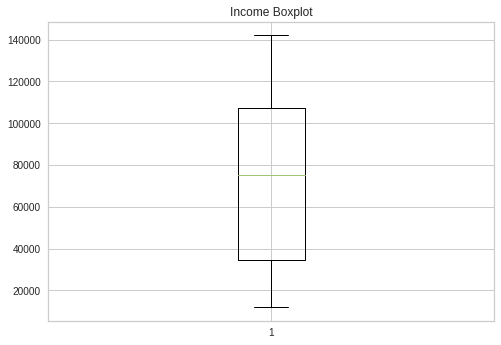

In [13]:

#Boxplot for Income

blue_diamond = dict(markerfacecolor='b', marker='D')
fig, ax2 = plt.subplots()
ax2.set_title('Income Boxplot')
ax2.boxplot(df1.Income, flierprops=blue_diamond)



Text(0.5, 1.0, 'SpendingScore Boxplot')

{'boxes': [<matplotlib.lines.Line2D at 0x7fbffe216750>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbffe6c8050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbfffc3b5d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbffe201e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbffe216d10>,
  <matplotlib.lines.Line2D at 0x7fbffe20b310>]}

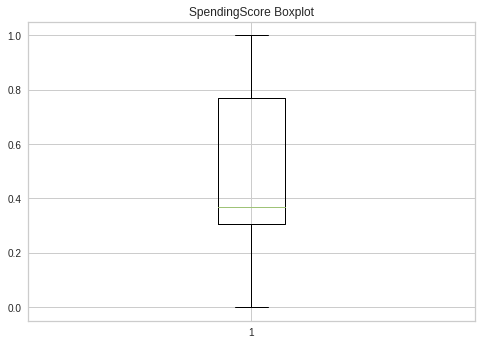

In [14]:
#Boxplot for SpendingScore    

green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax3 = plt.subplots()
ax3.set_title('SpendingScore Boxplot')
ax3.boxplot(df1.SpendingScore, flierprops=green_diamond)



Text(0.5, 1.0, 'Savings Boxplot')

{'boxes': [<matplotlib.lines.Line2D at 0x7fbffe127f10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbffe131f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbffe138f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbffe138a50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbffe1314d0>,
  <matplotlib.lines.Line2D at 0x7fbffe131a10>]}

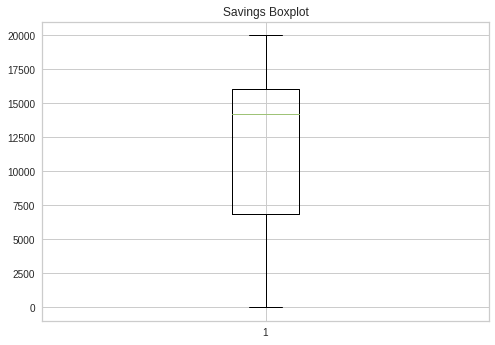

In [15]:
#Boxplot for Savings          

blue_diamond = dict(markerfacecolor='b', marker='D')
fig, ax4 = plt.subplots()
ax4.set_title('Savings Boxplot')
ax4.boxplot(df1.Savings, flierprops=blue_diamond)


#There are not outliers in the data.

In [16]:
#modify the dataset df1 from dataframe to numpy array
X = df1.to_numpy()
X.shape

(505, 4)

In [17]:
# Standardise the value so that the magnitude of income, saving (measures are in thousands) is comparable to age (measures are in tens/ hundred) and spending score (between 0 and 1). 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
# From SKlearn module import cluster.kmeans.  
from sklearn.cluster import KMeans

# KMeans1: Try to cluster into 4 clusters with K-means++ for initial centroid selection. The distance metric for Kmeans is Euclidean.
#WCSS: 189.70 and Silhouette score: 0.7581
k_means = KMeans(init="k-means++",n_clusters = 4, n_init=10,random_state=43)
k_means.fit(X)

#Display kmean cluster labels
k_means.labels_

#Display Cluster Centers
k_means.cluster_centers_

#Inverse Cluster Centers
scaler.inverse_transform(k_means.cluster_centers_)

# WCSS == Inertia
k_means.inertia_

#Silhouette Score for Internal Validation
silhouette_score(X, k_means.labels_)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=43, tol=0.0001, verbose=0)

array([2, 2, 2, 2, 1, 3, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0,
       2, 1, 0, 3, 3, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 3, 2,
       2, 3, 0, 3, 0, 2, 1, 0, 3, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 3, 3, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 3, 2, 0, 2, 1, 1, 0, 0, 2,
       2, 2, 2, 2, 3, 1, 2, 3, 0, 2, 2, 0, 0, 3, 0, 3, 0, 1, 1, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 2, 0, 3, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2,
       0, 2, 3, 1, 0, 3, 2, 0, 1, 2, 2, 3, 2, 3, 2, 0, 2, 1, 2, 0, 1, 2,
       1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 3, 3, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 3, 0,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 3, 2, 1, 1, 1, 1, 2, 1, 0, 3, 0, 1,
       2, 2, 0, 1, 0, 3, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 3, 2,
       2, 2, 0, 2, 0, 1, 3, 3, 3, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1,
       2, 1, 0, 3, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 3, 2, 0, 0, 2, 0, 1, 1, 0, 2,

array([[-0.72276928,  0.89502598, -0.90658925,  0.62188649],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636]])

array([[4.15894040e+01, 1.07695980e+05, 2.69934734e-01, 1.49372658e+04],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03]])

189.70178796659562

0.7581191889903789

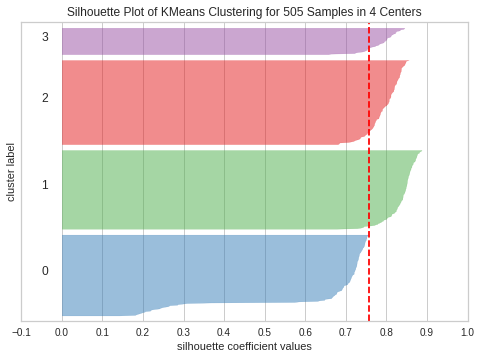

<Figure size 576x396 with 0 Axes>

In [19]:
#Silhouette Plot for KMeans 1
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
plt.savefig('Vis_Sil_Score.png');

In [20]:
# KMeans 2: Try to cluster into 4 clusters with random for initial centroid selection. The distance metric for Kmeans is Euclidean.
#WCSS: 189.70 and Silhouette score: 0.7581
k_means = KMeans(init="random",n_clusters = 4, n_init=10,random_state=43)
k_means.fit(X)

#Display kmean cluster labels
k_means.labels_

#Display Cluster Centers
k_means.cluster_centers_

#Inverse Cluster Centers
scaler.inverse_transform(k_means.cluster_centers_)

# WCSS == Inertia
k_means.inertia_

#Silhouette Score for Internal Validation
silhouette_score(X, k_means.labels_)

#The cluster, WCSS and Silhouette score are same for KMeans 1 and KMeans 2.


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=43,
       tol=0.0001, verbose=0)

array([0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 3, 3, 3, 3, 0, 3, 0, 1, 1, 3, 3, 3,
       0, 1, 3, 2, 2, 0, 1, 0, 0, 0, 1, 0, 3, 0, 1, 0, 3, 3, 0, 1, 2, 0,
       0, 2, 3, 2, 3, 0, 1, 3, 2, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 2, 2, 0, 0, 3, 1, 1, 3, 0, 3, 0, 0, 2, 0, 3, 0, 1, 1, 3, 3, 0,
       0, 0, 0, 0, 2, 1, 0, 2, 3, 0, 0, 3, 3, 2, 3, 2, 3, 1, 1, 3, 3, 0,
       1, 3, 0, 3, 3, 3, 0, 3, 2, 1, 3, 1, 1, 1, 3, 3, 0, 1, 0, 0, 3, 0,
       3, 0, 2, 1, 3, 2, 0, 3, 1, 0, 0, 2, 0, 2, 0, 3, 0, 1, 0, 3, 1, 0,
       1, 3, 3, 0, 1, 0, 3, 1, 0, 3, 1, 3, 1, 0, 3, 0, 1, 0, 3, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 3, 2, 2, 1, 3, 0, 0, 0, 3, 1, 0, 0, 0, 1, 2, 3,
       1, 1, 1, 3, 0, 3, 0, 3, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 3, 2, 3, 1,
       0, 0, 3, 1, 3, 2, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 0, 3, 3, 2, 0,
       0, 0, 3, 0, 3, 1, 2, 2, 2, 1, 0, 3, 1, 1, 3, 3, 0, 0, 3, 0, 0, 1,
       0, 1, 3, 2, 0, 3, 1, 0, 1, 1, 3, 0, 1, 1, 0, 0, 1, 3, 3, 3, 3, 1,
       1, 3, 3, 1, 1, 2, 0, 3, 3, 0, 3, 1, 1, 3, 0,

array([[ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [-0.72276928,  0.89502598, -0.90658925,  0.62188649]])

array([[5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [4.15894040e+01, 1.07695980e+05, 2.69934734e-01, 1.49372658e+04]])

189.70178796659562

0.7581191889903789

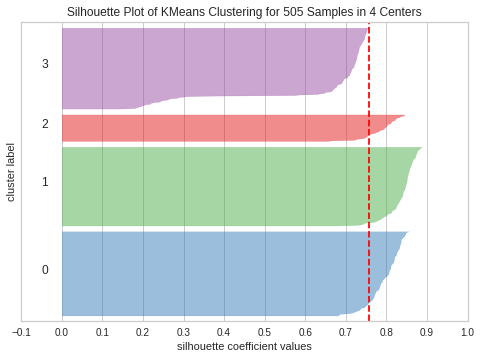

<Figure size 576x396 with 0 Axes>

In [21]:
#Silhouette Plot for KMeans 2
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
plt.savefig('Vis_Sil_Score.png');

In [22]:
# KMeans 3: Try to cluster into 5 clusters with k-means++ for initial centroid selection. The distance metric for Kmeans is Euclidean.
#WCSS: 66.51 and Silhouette score: 0.8049

k_means = KMeans(init="k-means++",n_clusters = 5, n_init=20,random_state=43)
k_means.fit(X)

#Display kmean cluster labels
k_means.labels_

#Display Cluster Centers
k_means.cluster_centers_

#Inverse Cluster Centers
scaler.inverse_transform(k_means.cluster_centers_)

# WCSS == Inertia
k_means.inertia_

#Silhouette Score for Internal Validation
silhouette_score(X, k_means.labels_)

#The WCSS for KMeans 3 is lower than KMeans 1 and KMeans 2 which signifies compact clusters (better than Kmean 1 and Kmeans 2). The silhouette score for KMeans 3 is higher than KMeans 1 and Kmean 2 which signifies clusters are farther apart from each other (better).

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=43, tol=0.0001, verbose=0)

array([2, 2, 2, 2, 1, 3, 2, 1, 1, 1, 4, 0, 0, 0, 2, 4, 2, 1, 1, 4, 0, 4,
       2, 1, 4, 3, 3, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 3, 2,
       2, 3, 4, 3, 0, 2, 1, 0, 3, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 3, 3, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 3, 2, 4, 2, 1, 1, 0, 0, 2,
       2, 2, 2, 2, 3, 1, 2, 3, 0, 2, 2, 0, 0, 3, 0, 3, 0, 1, 1, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 2, 0, 3, 1, 0, 1, 1, 1, 0, 4, 2, 1, 2, 2, 0, 2,
       0, 2, 3, 1, 4, 3, 2, 0, 1, 2, 2, 3, 2, 3, 2, 4, 2, 1, 2, 0, 1, 2,
       1, 4, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 3, 3, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 3, 0,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 3, 2, 1, 1, 1, 1, 2, 1, 0, 3, 0, 1,
       2, 2, 0, 1, 0, 3, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 3, 2,
       2, 2, 4, 2, 0, 1, 3, 3, 3, 1, 2, 0, 1, 1, 0, 0, 2, 2, 4, 2, 2, 1,
       2, 1, 0, 3, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 4, 0, 1,
       1, 0, 4, 1, 1, 3, 2, 0, 0, 2, 0, 1, 1, 0, 2,

array([[-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

array([[3.27777778e+01, 1.05265810e+05, 3.09926130e-01, 1.49627781e+04],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [8.60000000e+01, 1.19944040e+05, 6.83780993e-02, 1.48086838e+04]])

66.5111137485908

0.8048976287755765

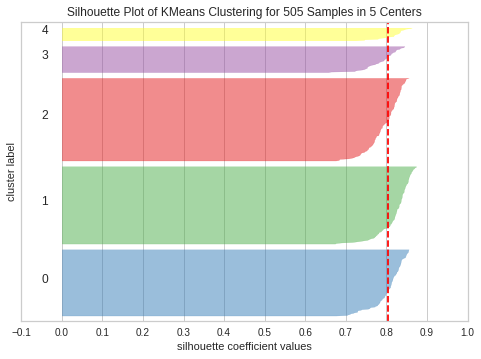

<Figure size 576x396 with 0 Axes>

In [23]:
#Silhouette Plot for KMeans 3
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
plt.savefig('Vis_Sil_Score.png');

In [24]:
# KMeans 4: Try to cluster into 5 clusters with random for initial centroid selection. The distance metric for Kmeans is Euclidean.
#WCSS: 66.51 and Silhouette score: 0.8049

k_means = KMeans(init="random",n_clusters = 5, n_init=20,random_state=43)
k_means.fit(X)

#Display kmean cluster labels
k_means.labels_

#Display Cluster Centers
k_means.cluster_centers_

#Inverse Cluster Centers
scaler.inverse_transform(k_means.cluster_centers_)

# WCSS == Inertia
k_means.inertia_

#Silhouette Score for Internal Validation
silhouette_score(X, k_means.labels_)

#The cluster, WCSS and Silhouette score are same for KMeans 3 and KMeans 4.


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=20, n_jobs=None, precompute_distances='auto', random_state=43,
       tol=0.0001, verbose=0)

array([4, 4, 4, 4, 3, 1, 4, 3, 3, 3, 2, 0, 0, 0, 4, 2, 4, 3, 3, 2, 0, 2,
       4, 3, 2, 1, 1, 4, 3, 4, 4, 4, 3, 4, 0, 4, 3, 4, 0, 0, 4, 3, 1, 4,
       4, 1, 2, 1, 0, 4, 3, 0, 1, 3, 4, 3, 0, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       3, 1, 1, 4, 4, 0, 3, 3, 0, 4, 0, 4, 4, 1, 4, 2, 4, 3, 3, 0, 0, 4,
       4, 4, 4, 4, 1, 3, 4, 1, 0, 4, 4, 0, 0, 1, 0, 1, 0, 3, 3, 0, 0, 4,
       3, 0, 4, 0, 0, 0, 4, 0, 1, 3, 0, 3, 3, 3, 0, 2, 4, 3, 4, 4, 0, 4,
       0, 4, 1, 3, 2, 1, 4, 0, 3, 4, 4, 1, 4, 1, 4, 2, 4, 3, 4, 0, 3, 4,
       3, 2, 0, 4, 3, 4, 0, 3, 4, 0, 3, 0, 3, 4, 0, 4, 3, 4, 0, 4, 3, 4,
       4, 3, 3, 3, 4, 4, 0, 1, 1, 3, 0, 4, 4, 4, 0, 3, 4, 4, 4, 3, 1, 0,
       3, 3, 3, 0, 4, 0, 4, 0, 4, 3, 1, 4, 3, 3, 3, 3, 4, 3, 0, 1, 0, 3,
       4, 4, 0, 3, 0, 1, 0, 4, 4, 3, 4, 4, 3, 4, 4, 4, 0, 4, 0, 0, 1, 4,
       4, 4, 2, 4, 0, 3, 1, 1, 1, 3, 4, 0, 3, 3, 0, 0, 4, 4, 2, 4, 4, 3,
       4, 3, 0, 1, 4, 0, 3, 4, 3, 3, 0, 4, 3, 3, 4, 4, 3, 0, 0, 2, 0, 3,
       3, 0, 2, 3, 3, 1, 4, 0, 0, 4, 0, 3, 3, 0, 4,

array([[-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483]])

array([[3.27777778e+01, 1.05265810e+05, 3.09926130e-01, 1.49627781e+04],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [8.60000000e+01, 1.19944040e+05, 6.83780993e-02, 1.48086838e+04],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03]])

66.5111137485908

0.8048976287755765

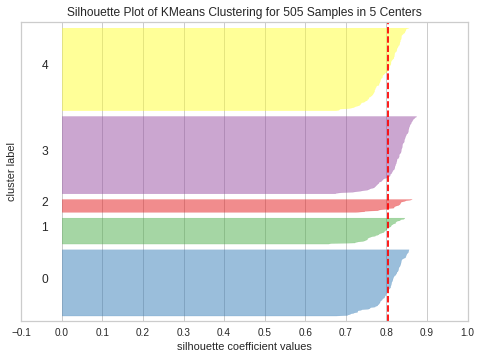

<Figure size 576x396 with 0 Axes>

In [25]:
#Silhouette Plot for KMeans 4
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
plt.savefig('Vis_Sil_Score.png');

In [26]:
# KMeans 5: Try to cluster into 3 clusters with k-means++ for initial centroid selection. The distance metric for Kmeans is Euclidean.
#WCSS: 384.81 and Silhouette score: 0.6963

k_means = KMeans(init="k-means++",n_clusters = 3, n_init=20,random_state=43)
k_means.fit(X)

#Display kmean cluster labels
k_means.labels_

#Display Cluster Centers
k_means.cluster_centers_

#Inverse Cluster Centers
scaler.inverse_transform(k_means.cluster_centers_)

# WCSS == Inertia
k_means.inertia_

#Silhouette Score for Internal Validation
silhouette_score(X, k_means.labels_)

#The WCSS for KMeans 5 is higher than KMeans 3 and KMeans 1 which signifies spread out clusters (worse than Kmean 1 and Kmeans 3). The silhouette score for KMeans 5 is lower than KMeans 1 and Kmean 2 which signifies clusters are nearer to each other (worse).

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=43, tol=0.0001, verbose=0)

array([2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0,
       2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 2, 2,
       2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2,
       0, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2,
       1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 0,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1,
       2, 2, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0, 2,

array([[-0.72276928,  0.89502598, -0.90658925,  0.62188649],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-0.31952856,  0.28812391,  1.14397016, -1.14260341]])

array([[4.15894040e+01, 1.07695980e+05, 2.69934734e-01, 1.49372658e+04],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.13140097e+01, 8.58734396e+04, 8.01801767e-01, 6.21305145e+03]])

384.8111859304379

0.6963481945884472

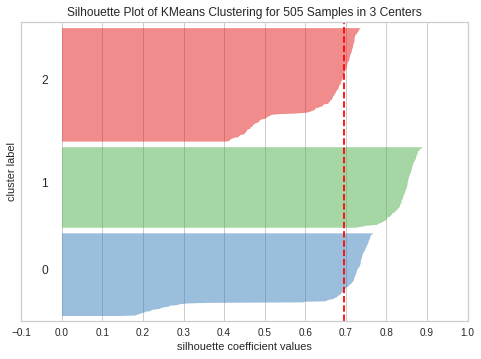

<Figure size 576x396 with 0 Axes>

In [27]:
#Silhouette Plot for KMeans 5
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
plt.savefig('Vis_Sil_Score.png');

In [28]:
# KMeans 6: Try to cluster into 3 clusters with random for initial centroid selection. The distance metric for Kmeans is Euclidean.
#WCSS: 384.81 and Silhouette score: 0.6963

k_means = KMeans(init="random",n_clusters = 3, n_init=20,random_state=43)
k_means.fit(X)

#Display kmean cluster labels
k_means.labels_

#Display Cluster Centers
k_means.cluster_centers_

#Inverse Cluster Centers
scaler.inverse_transform(k_means.cluster_centers_)

# WCSS == Inertia
k_means.inertia_

#Silhouette Score for Internal Validation
silhouette_score(X, k_means.labels_)

#The cluster, WCSS and Silhouette score are same for KMeans 5 and KMeans 6.

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=20, n_jobs=None, precompute_distances='auto', random_state=43,
       tol=0.0001, verbose=0)

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2,
       1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 1,
       2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 1,
       0, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2,
       0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0,
       1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1,

array([[ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-0.31952856,  0.28812391,  1.14397016, -1.14260341],
       [-0.72276928,  0.89502598, -0.90658925,  0.62188649]])

array([[8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.13140097e+01, 8.58734396e+04, 8.01801767e-01, 6.21305145e+03],
       [4.15894040e+01, 1.07695980e+05, 2.69934734e-01, 1.49372658e+04]])

384.8111859304379

0.6963481945884472

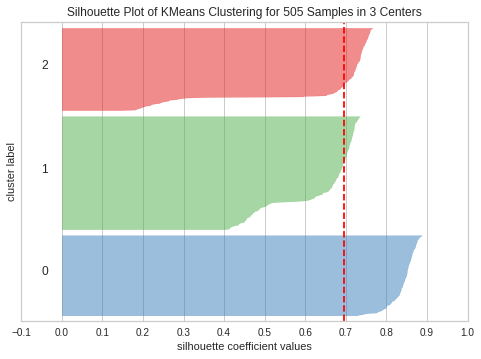

<Figure size 576x396 with 0 Axes>

In [29]:
#Silhouette Plot for KMeans 6
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
plt.savefig('Vis_Sil_Score.png');

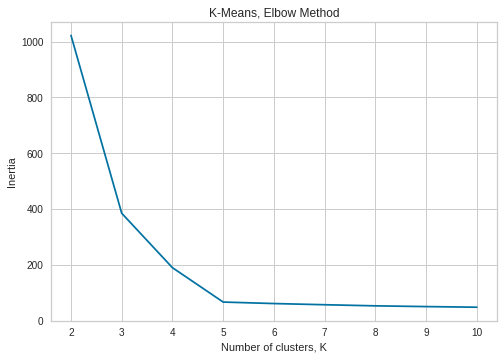

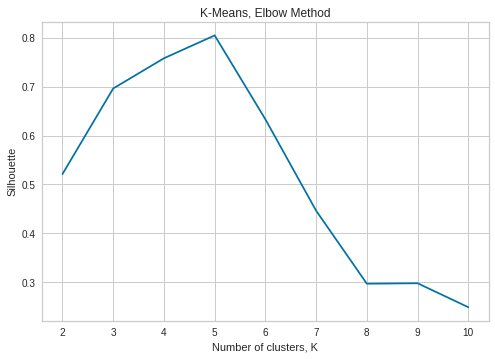

In [30]:
#Elbow method for hyper parameter tuning - Identify K

inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");
plt.savefig('kmeans-elbow-interia.png');


plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

plt.savefig('kmeans-elbow-silhouette.png');

# potential good K (number of clusters) could be 3, 4 or 5. 

In [31]:
# Run the same clustering for different pre-processing combination - MinMaxScaler

#modify the dataset df1 from dataframe to numpy array
X = df1.to_numpy()
X.shape

(505, 4)

In [32]:
# Standardise the value so that the magnitude of income, saving (measures are in thousands) is comparable to age (measures are in tens/ hundred) and spending score (between 0 and 1). 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [33]:
# KMeans 7: Try to cluster into 4 clusters with K-means++ for initial centroid selection. The distance metric for Kmeans is Euclidean.
#WCSS: 15.43 and Silhouette score: 0.7569
k_means = KMeans(init="k-means++",n_clusters = 4, n_init=10,random_state=43)
k_means.fit(X)

#Display kmean cluster labels
k_means.labels_

#Display Cluster Centers
k_means.cluster_centers_

#Inverse Cluster Centers
scaler.inverse_transform(k_means.cluster_centers_)

# WCSS == Inertia
k_means.inertia_

#Silhouette Score for Internal Validation
silhouette_score(X, k_means.labels_)

#WCSS score is substantially better than same configuration with standard scaler.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=43, tol=0.0001, verbose=0)

array([2, 2, 2, 2, 1, 3, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0,
       2, 1, 0, 3, 3, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 3, 2,
       2, 3, 0, 3, 0, 2, 1, 0, 3, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 3, 3, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 3, 2, 0, 2, 1, 1, 0, 0, 2,
       2, 2, 2, 2, 3, 1, 2, 3, 0, 2, 2, 0, 0, 3, 0, 3, 0, 1, 1, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 2, 0, 3, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2,
       0, 2, 3, 1, 0, 3, 2, 0, 1, 2, 2, 3, 2, 3, 2, 0, 2, 1, 2, 0, 1, 2,
       1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 3, 3, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 3, 0,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 3, 2, 1, 1, 1, 1, 2, 1, 0, 3, 0, 1,
       2, 2, 0, 1, 0, 3, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 3, 2,
       2, 2, 0, 2, 0, 1, 3, 3, 3, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1,
       2, 1, 0, 3, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 3, 2, 0, 0, 2, 0, 1, 1, 0, 2,

array([[0.30736755, 0.73612292, 0.26993473, 0.74686329],
       [0.88469388, 0.12204694, 0.32880046, 0.83296307],
       [0.53694268, 0.46498511, 0.77151837, 0.34449861],
       [0.08975   , 0.89253169, 0.89689164, 0.20437602]])

array([[4.15894040e+01, 1.07695980e+05, 2.69934734e-01, 1.49372658e+04],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03]])

15.425948692547262

0.7569364964839269

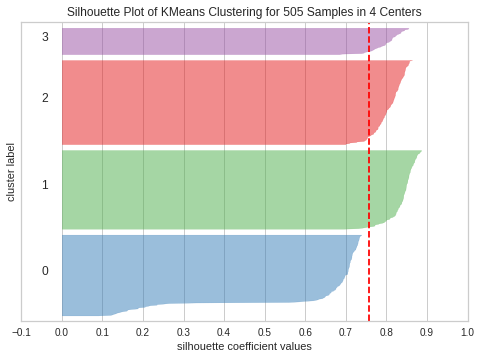

<Figure size 576x396 with 0 Axes>

In [34]:
#Silhouette Plot for KMeans 7
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
plt.savefig('Vis_Sil_Score.png');

In [35]:
# KMeans 8: Try to cluster into 4 clusters with random for initial centroid selection. The distance metric for Kmeans is Euclidean.
#WCSS: 15.43 and Silhouette score: 0.7569
k_means = KMeans(init="random",n_clusters = 4, n_init=10,random_state=43)
k_means.fit(X)

#Display kmean cluster labels
k_means.labels_

#Display Cluster Centers
k_means.cluster_centers_

#Inverse Cluster Centers
scaler.inverse_transform(k_means.cluster_centers_)

# WCSS == Inertia
k_means.inertia_

#Silhouette Score for Internal Validation
silhouette_score(X, k_means.labels_)

#The cluster, WCSS and Silhouette score are same for KMeans 7 and KMeans 8.

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=43,
       tol=0.0001, verbose=0)

array([0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 3, 3, 3, 3, 0, 3, 0, 1, 1, 3, 3, 3,
       0, 1, 3, 2, 2, 0, 1, 0, 0, 0, 1, 0, 3, 0, 1, 0, 3, 3, 0, 1, 2, 0,
       0, 2, 3, 2, 3, 0, 1, 3, 2, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 2, 2, 0, 0, 3, 1, 1, 3, 0, 3, 0, 0, 2, 0, 3, 0, 1, 1, 3, 3, 0,
       0, 0, 0, 0, 2, 1, 0, 2, 3, 0, 0, 3, 3, 2, 3, 2, 3, 1, 1, 3, 3, 0,
       1, 3, 0, 3, 3, 3, 0, 3, 2, 1, 3, 1, 1, 1, 3, 3, 0, 1, 0, 0, 3, 0,
       3, 0, 2, 1, 3, 2, 0, 3, 1, 0, 0, 2, 0, 2, 0, 3, 0, 1, 0, 3, 1, 0,
       1, 3, 3, 0, 1, 0, 3, 1, 0, 3, 1, 3, 1, 0, 3, 0, 1, 0, 3, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 3, 2, 2, 1, 3, 0, 0, 0, 3, 1, 0, 0, 0, 1, 2, 3,
       1, 1, 1, 3, 0, 3, 0, 3, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 3, 2, 3, 1,
       0, 0, 3, 1, 3, 2, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 0, 3, 3, 2, 0,
       0, 0, 3, 0, 3, 1, 2, 2, 2, 1, 0, 3, 1, 1, 3, 3, 0, 0, 3, 0, 0, 1,
       0, 1, 3, 2, 0, 3, 1, 0, 1, 1, 3, 0, 1, 1, 0, 0, 1, 3, 3, 3, 3, 1,
       1, 3, 3, 1, 1, 2, 0, 3, 3, 0, 3, 1, 1, 3, 0,

array([[0.53694268, 0.46498511, 0.77151837, 0.34449861],
       [0.88469388, 0.12204694, 0.32880046, 0.83296307],
       [0.08975   , 0.89253169, 0.89689164, 0.20437602],
       [0.30736755, 0.73612292, 0.26993473, 0.74686329]])

array([[5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [4.15894040e+01, 1.07695980e+05, 2.69934734e-01, 1.49372658e+04]])

15.425948692547262

0.7569364964839269

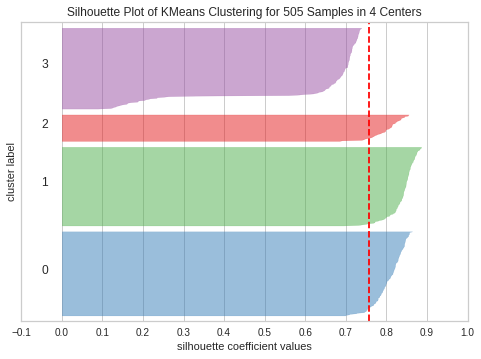

<Figure size 576x396 with 0 Axes>

In [36]:
#Silhouette Plot for KMeans 8
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
plt.savefig('Vis_Sil_Score.png');

In [37]:
# KMeans 9: Try to cluster into 5 clusters with k-means++ for initial centroid selection. The distance metric for Kmeans is Euclidean.
#WCSS: 4.70 and Silhouette score: 0.8157

k_means = KMeans(init="k-means++",n_clusters = 5, n_init=20,random_state=43)
k_means.fit(X)

#Display kmean cluster labels
k_means.labels_

#Display Cluster Centers
k_means.cluster_centers_

#Inverse Cluster Centers
scaler.inverse_transform(k_means.cluster_centers_)

# WCSS == Inertia
k_means.inertia_

#Silhouette Score for Internal Validation
silhouette_score(X, k_means.labels_)

#The WCSS for KMeans 9 is lower than KMeans 7 and KMeans 3 which signifies compact clusters (better than Kmean 1 and Kmeans 2). The silhouette score for KMeans 9 is higher than KMeans 7 and Kmean 3 which signifies clusters are farther apart from each other (better).

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=43, tol=0.0001, verbose=0)

array([2, 2, 2, 2, 1, 3, 2, 1, 1, 1, 4, 0, 0, 0, 2, 4, 2, 1, 1, 4, 0, 4,
       2, 1, 4, 3, 3, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 3, 2,
       2, 3, 4, 3, 0, 2, 1, 0, 3, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 3, 3, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 3, 2, 4, 2, 1, 1, 0, 0, 2,
       2, 2, 2, 2, 3, 1, 2, 3, 0, 2, 2, 0, 0, 3, 0, 3, 0, 1, 1, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 2, 0, 3, 1, 0, 1, 1, 1, 0, 4, 2, 1, 2, 2, 0, 2,
       0, 2, 3, 1, 4, 3, 2, 0, 1, 2, 2, 3, 2, 3, 2, 4, 2, 1, 2, 0, 1, 2,
       1, 4, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 3, 3, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 3, 0,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 3, 2, 1, 1, 1, 1, 2, 1, 0, 3, 0, 1,
       2, 2, 0, 1, 0, 3, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 3, 2,
       2, 2, 4, 2, 0, 1, 3, 3, 3, 1, 2, 0, 1, 1, 0, 0, 2, 2, 4, 2, 2, 1,
       2, 1, 0, 3, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 4, 0, 1,
       1, 0, 4, 1, 1, 3, 2, 0, 0, 2, 0, 1, 1, 0, 2,

array([[0.19722222, 0.7174293 , 0.30992613, 0.7481389 ],
       [0.88469388, 0.12204694, 0.32880046, 0.83296307],
       [0.53694268, 0.46498511, 0.77151837, 0.34449861],
       [0.08975   , 0.89253169, 0.89689164, 0.20437602],
       [0.8625    , 0.83033877, 0.0683781 , 0.74043419]])

array([[3.27777778e+01, 1.05265810e+05, 3.09926130e-01, 1.49627781e+04],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [8.60000000e+01, 1.19944040e+05, 6.83780993e-02, 1.48086838e+04]])

4.708691535787536

0.8156911152768872

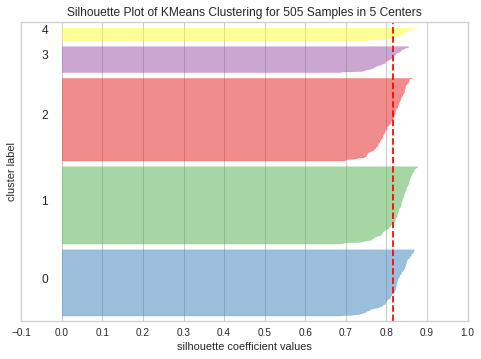

<Figure size 576x396 with 0 Axes>

In [38]:
#Silhouette Plot for KMeans 9
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
plt.savefig('Vis_Sil_Score.png');

In [39]:
# KMeans 10: Try to cluster into 5 clusters with random for initial centroid selection. The distance metric for Kmeans is Euclidean.
#WCSS: 4.70 and Silhouette score: 0.8157

k_means = KMeans(init="random",n_clusters = 5, n_init=20,random_state=43)
k_means.fit(X)

#Display kmean cluster labels
k_means.labels_

#Display Cluster Centers
k_means.cluster_centers_

#Inverse Cluster Centers
scaler.inverse_transform(k_means.cluster_centers_)

# WCSS == Inertia
k_means.inertia_

#Silhouette Score for Internal Validation
silhouette_score(X, k_means.labels_)

#The cluster, WCSS and Silhouette score are same for KMeans 9 and KMeans 10.


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=20, n_jobs=None, precompute_distances='auto', random_state=43,
       tol=0.0001, verbose=0)

array([4, 4, 4, 4, 3, 1, 4, 3, 3, 3, 2, 0, 0, 0, 4, 2, 4, 3, 3, 2, 0, 2,
       4, 3, 2, 1, 1, 4, 3, 4, 4, 4, 3, 4, 0, 4, 3, 4, 0, 0, 4, 3, 1, 4,
       4, 1, 2, 1, 0, 4, 3, 0, 1, 3, 4, 3, 0, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       3, 1, 1, 4, 4, 0, 3, 3, 0, 4, 0, 4, 4, 1, 4, 2, 4, 3, 3, 0, 0, 4,
       4, 4, 4, 4, 1, 3, 4, 1, 0, 4, 4, 0, 0, 1, 0, 1, 0, 3, 3, 0, 0, 4,
       3, 0, 4, 0, 0, 0, 4, 0, 1, 3, 0, 3, 3, 3, 0, 2, 4, 3, 4, 4, 0, 4,
       0, 4, 1, 3, 2, 1, 4, 0, 3, 4, 4, 1, 4, 1, 4, 2, 4, 3, 4, 0, 3, 4,
       3, 2, 0, 4, 3, 4, 0, 3, 4, 0, 3, 0, 3, 4, 0, 4, 3, 4, 0, 4, 3, 4,
       4, 3, 3, 3, 4, 4, 0, 1, 1, 3, 0, 4, 4, 4, 0, 3, 4, 4, 4, 3, 1, 0,
       3, 3, 3, 0, 4, 0, 4, 0, 4, 3, 1, 4, 3, 3, 3, 3, 4, 3, 0, 1, 0, 3,
       4, 4, 0, 3, 0, 1, 0, 4, 4, 3, 4, 4, 3, 4, 4, 4, 0, 4, 0, 0, 1, 4,
       4, 4, 2, 4, 0, 3, 1, 1, 1, 3, 4, 0, 3, 3, 0, 0, 4, 4, 2, 4, 4, 3,
       4, 3, 0, 1, 4, 0, 3, 4, 3, 3, 0, 4, 3, 3, 4, 4, 3, 0, 0, 2, 0, 3,
       3, 0, 2, 3, 3, 1, 4, 0, 0, 4, 0, 3, 3, 0, 4,

array([[0.19722222, 0.7174293 , 0.30992613, 0.7481389 ],
       [0.08975   , 0.89253169, 0.89689164, 0.20437602],
       [0.8625    , 0.83033877, 0.0683781 , 0.74043419],
       [0.88469388, 0.12204694, 0.32880046, 0.83296307],
       [0.53694268, 0.46498511, 0.77151837, 0.34449861]])

array([[3.27777778e+01, 1.05265810e+05, 3.09926130e-01, 1.49627781e+04],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [8.60000000e+01, 1.19944040e+05, 6.83780993e-02, 1.48086838e+04],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03]])

4.708691535787536

0.8156911152768872

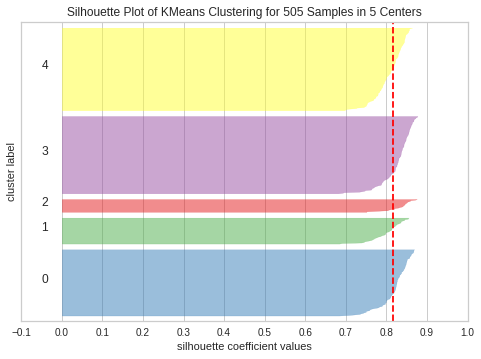

<Figure size 576x396 with 0 Axes>

In [40]:
#Silhouette Plot for KMeans 10
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
plt.savefig('Vis_Sil_Score.png');

In [41]:
# KMeans 11: Try to cluster into 3 clusters with k-means++ for initial centroid selection. The distance metric for Kmeans is Euclidean.
#WCSS: 31.28 and Silhouette score: 0.6823

k_means = KMeans(init="k-means++",n_clusters = 3, n_init=20,random_state=43)
k_means.fit(X)

#Display kmean cluster labels
k_means.labels_

#Display Cluster Centers
k_means.cluster_centers_

#Inverse Cluster Centers
scaler.inverse_transform(k_means.cluster_centers_)

# WCSS == Inertia
k_means.inertia_

#Silhouette Score for Internal Validation
silhouette_score(X, k_means.labels_)

#The WCSS for KMeans 5 is higher than KMeans 11 and KMeans 9 which signifies spread out clusters (worse than Kmean 7 and Kmeans 9). The silhouette score for KMeans 11 is lower than KMeans 7 and Kmean 9 which signifies clusters are nearer to each other (worse).

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=43, tol=0.0001, verbose=0)

array([2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0,
       2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 2, 2,
       2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2,
       0, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2,
       1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 0,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1,
       2, 2, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0, 2,

array([[0.30736755, 0.73612292, 0.26993473, 0.74686329],
       [0.88469388, 0.12204694, 0.32880046, 0.83296307],
       [0.42892512, 0.56825723, 0.80180177, 0.31065257]])

array([[4.15894040e+01, 1.07695980e+05, 2.69934734e-01, 1.49372658e+04],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.13140097e+01, 8.58734396e+04, 8.01801767e-01, 6.21305145e+03]])

31.2825759603508

0.6823512495574657

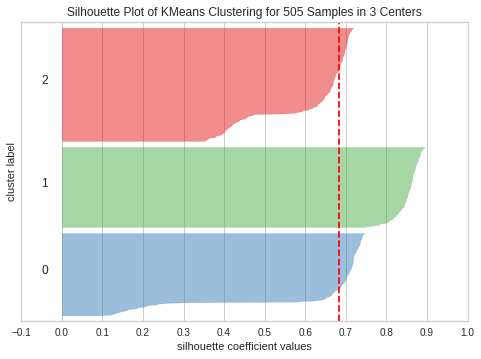

<Figure size 576x396 with 0 Axes>

In [42]:
#Silhouette Plot for KMeans 11
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
plt.savefig('Vis_Sil_Score.png');

In [43]:
# KMeans 12: Try to cluster into 3 clusters with random for initial centroid selection. The distance metric for Kmeans is Euclidean.
#WCSS: 31.28 and Silhouette score: 0.6823

k_means = KMeans(init="random",n_clusters = 3, n_init=20,random_state=43)
k_means.fit(X)

#Display kmean cluster labels
k_means.labels_

#Display Cluster Centers
k_means.cluster_centers_

#Inverse Cluster Centers
scaler.inverse_transform(k_means.cluster_centers_)

# WCSS == Inertia
k_means.inertia_

#Silhouette Score for Internal Validation
silhouette_score(X, k_means.labels_)

#The cluster, WCSS and Silhouette score are same for KMeans 11 and KMeans 12.

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=20, n_jobs=None, precompute_distances='auto', random_state=43,
       tol=0.0001, verbose=0)

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2,
       1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 1,
       2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 1,
       0, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2,
       0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0,
       1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1,

array([[0.88469388, 0.12204694, 0.32880046, 0.83296307],
       [0.42892512, 0.56825723, 0.80180177, 0.31065257],
       [0.30736755, 0.73612292, 0.26993473, 0.74686329]])

array([[8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.13140097e+01, 8.58734396e+04, 8.01801767e-01, 6.21305145e+03],
       [4.15894040e+01, 1.07695980e+05, 2.69934734e-01, 1.49372658e+04]])

31.2825759603508

0.6823512495574657

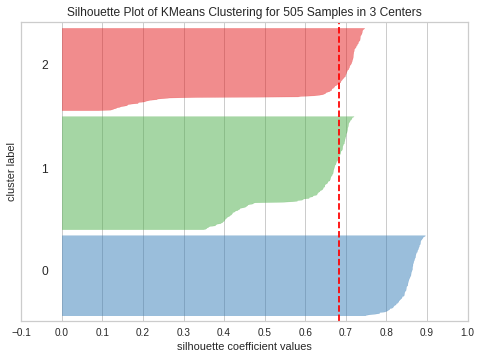

<Figure size 576x396 with 0 Axes>

In [44]:
#Silhouette Plot for KMeans 12
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
plt.savefig('Vis_Sil_Score.png');

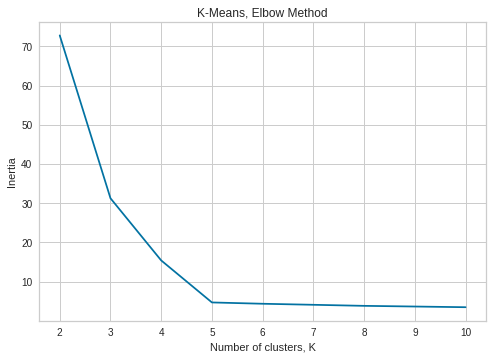

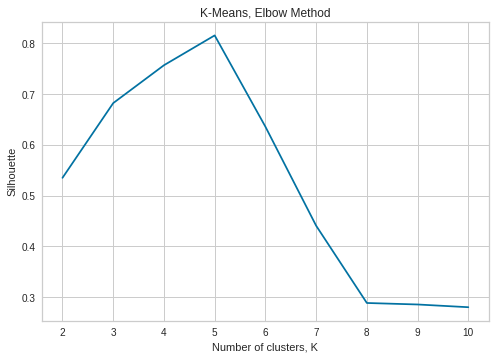

In [45]:
#Elbow method for hyper parameter tuning - Identify K

inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");
plt.savefig('kmeans-elbow-interia.png');


plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");
plt.savefig('kmeans-elbow-silhouette.png');

#Potential good cluster size are 5, 4 and 3.

In [46]:
# Run the best model

k_means = KMeans(init="k-means++",n_clusters = 5, n_init=20,random_state=43)
k_means.fit(X)

#Display kmean cluster labels
k_means.labels_

#Display Cluster Centers
k_means.cluster_centers_

#Inverse Cluster Centers
scaler.inverse_transform(k_means.cluster_centers_)

# WCSS == Inertia
k_means.inertia_

#Silhouette Score for Internal Validation
silhouette_score(X, k_means.labels_)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=43, tol=0.0001, verbose=0)

array([2, 2, 2, 2, 1, 3, 2, 1, 1, 1, 4, 0, 0, 0, 2, 4, 2, 1, 1, 4, 0, 4,
       2, 1, 4, 3, 3, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 3, 2,
       2, 3, 4, 3, 0, 2, 1, 0, 3, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 3, 3, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 3, 2, 4, 2, 1, 1, 0, 0, 2,
       2, 2, 2, 2, 3, 1, 2, 3, 0, 2, 2, 0, 0, 3, 0, 3, 0, 1, 1, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 2, 0, 3, 1, 0, 1, 1, 1, 0, 4, 2, 1, 2, 2, 0, 2,
       0, 2, 3, 1, 4, 3, 2, 0, 1, 2, 2, 3, 2, 3, 2, 4, 2, 1, 2, 0, 1, 2,
       1, 4, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 3, 3, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 3, 0,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 3, 2, 1, 1, 1, 1, 2, 1, 0, 3, 0, 1,
       2, 2, 0, 1, 0, 3, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 3, 2,
       2, 2, 4, 2, 0, 1, 3, 3, 3, 1, 2, 0, 1, 1, 0, 0, 2, 2, 4, 2, 2, 1,
       2, 1, 0, 3, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 4, 0, 1,
       1, 0, 4, 1, 1, 3, 2, 0, 0, 2, 0, 1, 1, 0, 2,

array([[0.19722222, 0.7174293 , 0.30992613, 0.7481389 ],
       [0.88469388, 0.12204694, 0.32880046, 0.83296307],
       [0.53694268, 0.46498511, 0.77151837, 0.34449861],
       [0.08975   , 0.89253169, 0.89689164, 0.20437602],
       [0.8625    , 0.83033877, 0.0683781 , 0.74043419]])

array([[3.27777778e+01, 1.05265810e+05, 3.09926130e-01, 1.49627781e+04],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [8.60000000e+01, 1.19944040e+05, 6.83780993e-02, 1.48086838e+04]])

4.708691535787536

0.8156911152768872

In [47]:
#Analyse Cluster Centers
set(k_means.labels_)
df = df1.copy()
df["Cluster"] = k_means.labels_
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = df[df["Cluster"]==label].copy()
    X_tmp.loc['mean'] = X_tmp.mean()
    X_tmp.tail(13)

{0, 1, 2, 3, 4}


Cluster 0:


Age         Income  SpendingScore       Savings  Cluster
454   31.000000  107932.000000       0.374242  12207.526078      0.0
457   35.000000  110106.000000       0.286769  14924.537223      0.0
460   28.000000  100592.000000       0.259598  15520.355776      0.0
461   33.000000  116616.000000       0.320930  15104.498114      0.0
463   28.000000   94762.000000       0.303596  15352.521937      0.0
468   32.000000  117050.000000       0.311356  14310.546207      0.0
471   31.000000  101209.000000       0.304323  16917.571691      0.0
476   33.000000  106757.000000       0.258396  14431.652799      0.0
477   33.000000  107100.000000       0.342435  14895.473479      0.0
482   32.000000  108417.000000       0.287371  16696.398659      0.0
498   30.000000   98030.000000       0.411112  16316.842905      0.0
500   28.000000  101206.000000       0.387441  14936.775389      0.0
mean  32.777778  105265.809524       0.309926  14962.778066      0.0


Cluster 1:


Age        Income  SpendingScore       Savings  Cluster
485   90.00000  22782.000000       0.356307  15924.071708      1.0
486   91.00000  28165.000000       0.303693  17460.179350      1.0
488   92.00000  18724.000000       0.327862  15341.381110      1.0
489   97.00000  27271.000000       0.283923  14928.165597      1.0
490   84.00000  36463.000000       0.353621  16563.372591      1.0
493   92.00000  36032.000000       0.336968  17348.599881      1.0
494   87.00000  29909.000000       0.342152  18142.232747      1.0
497   91.00000  30756.000000       0.303698  15492.004711      1.0
501   93.00000  19934.000000       0.203140  17969.693769      1.0
502   90.00000  35297.000000       0.355149  16091.401954      1.0
503   91.00000  20681.000000       0.354679  18401.088445      1.0
504   89.00000  30267.000000       0.289310  14386.351880      1.0
mean  87.77551  27866.102041       0.328800  16659.261445      1.0


Cluster 2:


Age        Income  SpendingScore      Savings  Cluster
467   61.000000  72027.000000       0.762325  6926.123598      2.0
469   63.000000  70580.000000       0.766509  7262.108723      2.0
470   58.000000  70676.000000       0.764028  7664.415651      2.0
472   62.000000  73675.000000       0.796619  4688.657157      2.0
473   60.000000  63476.000000       0.751900  7543.542802      2.0
474   62.000000  67731.000000       0.819170  5956.555677      2.0
478   65.000000  70430.000000       0.696994  6971.164886      2.0
479   59.000000  69408.000000       0.879906  6491.771150      2.0
480   65.000000  71229.000000       0.787890  9024.337461      2.0
491   58.000000  70369.000000       0.904520  7461.567503      2.0
492   61.000000  74282.000000       0.692236  7286.754751      2.0
495   66.000000  77052.000000       0.707262  6296.417311      2.0
mean  59.955414  72448.063694       0.771518  6889.972190      2.0


Cluster 3:


Age     Income  SpendingScore      Savings  Cluster
406   25.00  120957.00       0.877673  5590.447216      3.0
412   21.00  129726.00       0.951792  4550.799522      3.0
415   26.00  125662.00       0.926818  6089.478323      3.0
442   17.00  136255.00       0.935876  4126.226651      3.0
445   24.00  120465.00       0.907485  4838.348350      3.0
451   27.00  122671.00       0.910107  4206.287239      3.0
456   17.00  123828.00       0.942013  3798.840400      3.0
458   28.00  127699.00       0.881425  5490.814956      3.0
466   18.00  123718.00       0.806553  4420.445821      3.0
487   26.00  123005.00       0.984526  4371.234733      3.0
496   22.00  132948.00       0.889800  2839.786357      3.0
499   25.00  128625.00       0.816739  4914.117127      3.0
mean  24.18  128029.12       0.896892  4087.520309      3.0


Cluster 4:


Age     Income  SpendingScore       Savings  Cluster
283   90.0  124170.00       0.030751  14773.407206      4.0
288   83.0  117347.00       0.155694  15086.701120      4.0
311   85.0  118169.00       0.123196  14855.951024      4.0
312   88.0  114767.00       0.032208  17833.093470      4.0
343   84.0  115237.00       0.068778  14396.568282      4.0
351   91.0  118794.00       0.019212  14047.388986      4.0
353   77.0  128596.00       0.040824  14503.410786      4.0
368   84.0  110582.00       0.079049  14937.995170      4.0
383   87.0  117564.00       0.128280  14000.248965      4.0
414   88.0  123651.00       0.029027  13504.577572      4.0
427   86.0  124372.00       0.000000  15374.465953      4.0
455   93.0  126601.00       0.025170  14117.447037      4.0
mean  86.0  119944.04       0.068378  14808.683793      4.0

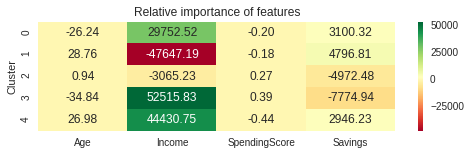

In [48]:
#Relative Importance Plot

import seaborn as sns

cluster_avg = df.groupby(['Cluster']).mean()
population_avg = df.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(8, 2));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');
plt.savefig('outmall-kmeans-5-importance.png', transparent=False);

## 1.2: Clustering Algorithm #2

In [49]:
# Data has already been analysed so will move straight to data processing.
#modify the dataset df1 from dataframe to numpy array
X = df1.to_numpy()
X.shape


Y = df1.to_numpy()
Y.shape


(505, 4)

(505, 4)

In [50]:
# Standardise the value so that the magnitude of income, saving (measures are in thousands) is comparable to age (measures are in tens/ hundred) and spending score (between 0 and 1). 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

# Standardise the value so that the magnitude of income, saving (measures are in thousands) is comparable to age (measures are in tens/ hundred) and spending score (between 0 and 1). 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Y = scaler.fit_transform(Y)
Y

array([[-4.22871323e-02,  6.27330450e-02,  1.10359261e+00,
        -1.07246676e+00],
       [-8.21109365e-04,  1.74810526e-01,  1.10264136e+00,
        -1.30347264e+00],
       [ 1.23576959e-01, -2.11999168e-02,  7.61727378e-01,
        -5.26555609e-01],
       ...,
       [ 1.28462560e+00, -1.11844679e+00, -5.78054216e-01,
         8.55312853e-01],
       [ 1.32609162e+00, -1.52492929e+00, -5.79865675e-01,
         1.32245159e+00],
       [ 1.24315958e+00, -1.25833506e+00, -8.31889623e-01,
         5.10463045e-01]])

array([[0.5125    , 0.50591538, 0.79132878, 0.3279915 ],
       [0.525     , 0.53691538, 0.79108205, 0.27088307],
       [0.5625    , 0.4827    , 0.70265695, 0.46294965],
       ...,
       [0.9125    , 0.17920769, 0.35514902, 0.8045701 ],
       [0.925     , 0.06677692, 0.35467917, 0.92005442],
       [0.9       , 0.14051538, 0.28931007, 0.71931759]])

<Figure size 576x396 with 0 Axes>

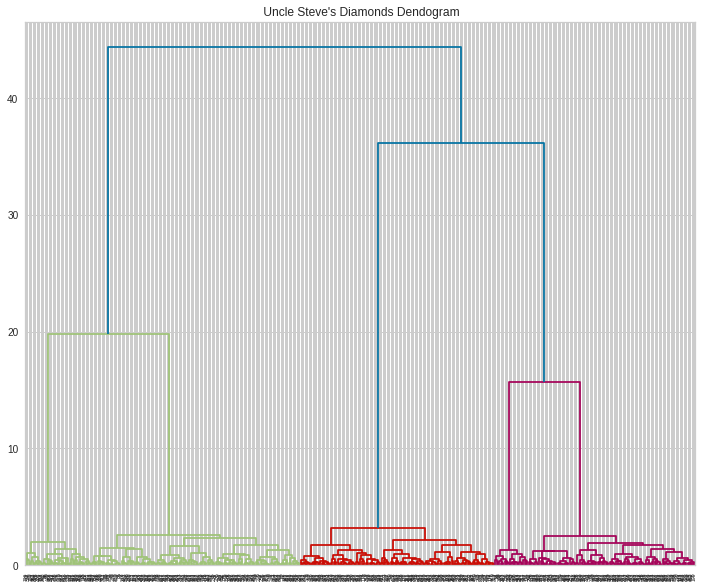

In [51]:
# Hierarchical 1: Setting up and running linkage. Method: ward which minimizes Ward variance .Metric is the distance measure and we are using euclidean.
from scipy.cluster.hierarchy import linkage, fcluster
h = linkage(X,method="ward",metric="euclidean")

#plot a dendrogram. This helps to visualise the different, potential (possible) clusters.
from scipy.cluster.hierarchy import dendrogram
plt.clf()
plt.figure(figsize=(12,10));
plt.title(" Uncle Steve's Diamonds Dendogram");  
dendrogram(h);



In [52]:
#Build Clusters (#5)
labels = fcluster(h, 5, criterion="maxclust")

df = df1.copy()
df["Cluster"] = labels
#X["Cluster"] = labels
#Cluster Means

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)


means = np.zeros((5, df.shape[1]))
#Means for each cluster
for i, label in enumerate(set(labels)):
    means[i,:] = df[df["Cluster"]==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, df[df["Cluster"]==label].count()[0]))
    print(means[i,:4])
print("\n\n")
means


Cluster 1 (n=50):
[    24.18 128029.12      0.9    4087.52]

Cluster 2 (n=157):
[   59.96 72448.06     0.77  6889.97]

Cluster 3 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster 4 (n=25):
[    86.   119944.04      0.07  14808.68]

Cluster 5 (n=126):
[    32.78 105265.81      0.31  14962.78]





array([[    24.18, 128029.12,      0.9 ,   4087.52,      1.  ],
       [    59.96,  72448.06,      0.77,   6889.97,      2.  ],
       [    87.78,  27866.1 ,      0.33,  16659.26,      3.  ],
       [    86.  , 119944.04,      0.07,  14808.68,      4.  ],
       [    32.78, 105265.81,      0.31,  14962.78,      5.  ]])

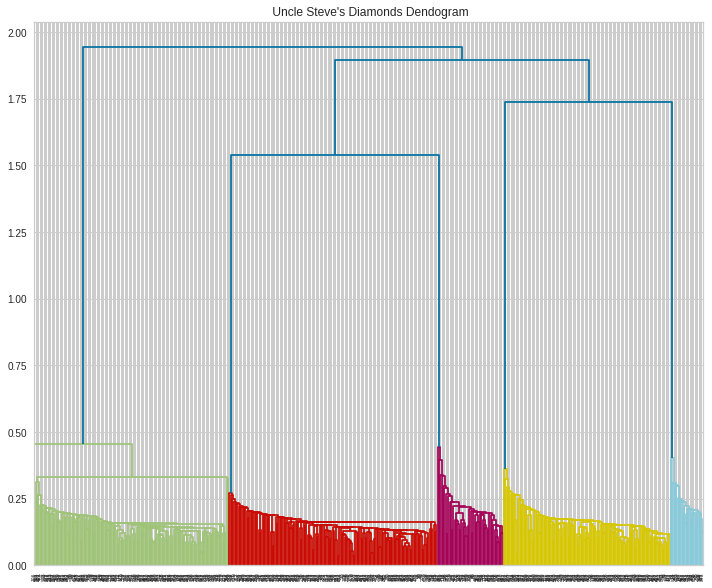

In [53]:
# Hierarchical 2: Setting up and running linkage. Method: single which measures distance between nearest points on clusters .Metric is the distance measure and we are using euclidean.
from scipy.cluster.hierarchy import linkage
h = linkage(X,method="single",metric="euclidean")

#plot a dendrogram. This helps to visualise the different, potential (possible) clusters.
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(12,10));
plt.title(" Uncle Steve's Diamonds Dendogram");  
dendrogram(h);

In [54]:
#Build Clusters (#5)
labels = fcluster(h, 5, criterion="maxclust")

df = df1.copy()
df["Cluster"] = labels
#X["Cluster"] = labels
#Cluster Means

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)


means = np.zeros((5, df.shape[1]))
#Means for each cluster
for i, label in enumerate(set(labels)):
    means[i,:] = df[df["Cluster"]==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, df[df["Cluster"]==label].count()[0]))
    print(means[i,:4])
print("\n\n")
means


Cluster 1 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster 2 (n=157):
[   59.96 72448.06     0.77  6889.97]

Cluster 3 (n=50):
[    24.18 128029.12      0.9    4087.52]

Cluster 4 (n=126):
[    32.78 105265.81      0.31  14962.78]

Cluster 5 (n=25):
[    86.   119944.04      0.07  14808.68]





array([[    87.78,  27866.1 ,      0.33,  16659.26,      1.  ],
       [    59.96,  72448.06,      0.77,   6889.97,      2.  ],
       [    24.18, 128029.12,      0.9 ,   4087.52,      3.  ],
       [    32.78, 105265.81,      0.31,  14962.78,      4.  ],
       [    86.  , 119944.04,      0.07,  14808.68,      5.  ]])

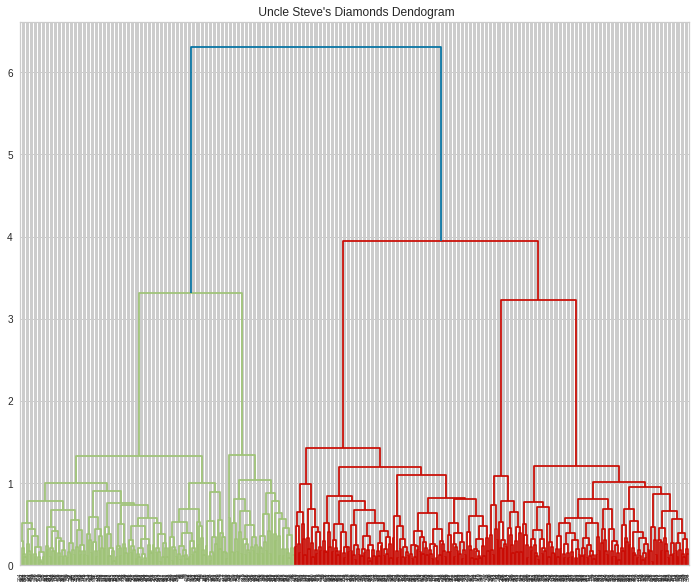

In [55]:
#Hierarchical 3: Setting up and running linkage. Method: complete which measures distance between farthest points on clusters .Metric is the distance measure and we are using euclidean.
from scipy.cluster.hierarchy import linkage
h = linkage(X,method="complete",metric="euclidean")

#plot a dendrogram. This helps to visualise the different, potential (possible) clusters.
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(12,10));
plt.title(" Uncle Steve's Diamonds Dendogram");  
dendrogram(h);

In [56]:
#Build Clusters (#5)
labels = fcluster(h, 5, criterion="maxclust")

df = df1.copy()
df["Cluster"] = labels
#X["Cluster"] = labels
#Cluster Means

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)


means = np.zeros((5, df.shape[1]))
#Means for each cluster
for i, label in enumerate(set(labels)):
    means[i,:] = df[df["Cluster"]==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, df[df["Cluster"]==label].count()[0]))
    print(means[i,:4])
print("\n\n")
means


Cluster 1 (n=157):
[   59.96 72448.06     0.77  6889.97]

Cluster 2 (n=50):
[    24.18 128029.12      0.9    4087.52]

Cluster 3 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster 4 (n=25):
[    86.   119944.04      0.07  14808.68]

Cluster 5 (n=126):
[    32.78 105265.81      0.31  14962.78]





array([[    59.96,  72448.06,      0.77,   6889.97,      1.  ],
       [    24.18, 128029.12,      0.9 ,   4087.52,      2.  ],
       [    87.78,  27866.1 ,      0.33,  16659.26,      3.  ],
       [    86.  , 119944.04,      0.07,  14808.68,      4.  ],
       [    32.78, 105265.81,      0.31,  14962.78,      5.  ]])

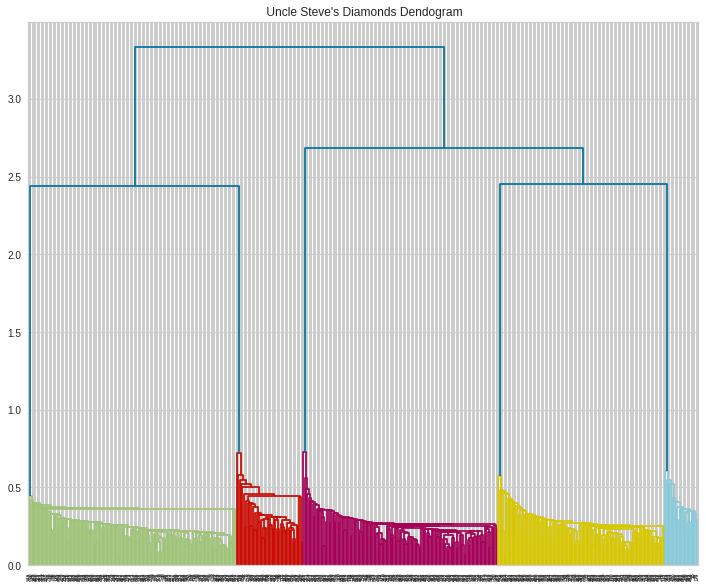

In [57]:
#Hierarchical 4: Setting up and running linkage. Method: single which measures distance between nearest points on clusters .Metric is the distance measure and we are using Cityblock/ Manhattan.
from scipy.cluster.hierarchy import linkage
h = linkage(X,method="single",metric="cityblock")

#plot a dendrogram. This helps to visualise the different, potential (possible) clusters.
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(12,10));
plt.title(" Uncle Steve's Diamonds Dendogram");  
dendrogram(h);

In [58]:
#Build Clusters(#5)
labels = fcluster(h, 5, criterion="maxclust")

df = df1.copy()
df["Cluster"] = labels
#X["Cluster"] = labels
#Cluster Means

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)


means = np.zeros((5, df.shape[1]))
#Means for each cluster
for i, label in enumerate(set(labels)):
    means[i,:] = df[df["Cluster"]==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, df[df["Cluster"]==label].count()[0]))
    print(means[i,:4])
print("\n\n")
means


Cluster 1 (n=157):
[   59.96 72448.06     0.77  6889.97]

Cluster 2 (n=50):
[    24.18 128029.12      0.9    4087.52]

Cluster 3 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster 4 (n=126):
[    32.78 105265.81      0.31  14962.78]

Cluster 5 (n=25):
[    86.   119944.04      0.07  14808.68]





array([[    59.96,  72448.06,      0.77,   6889.97,      1.  ],
       [    24.18, 128029.12,      0.9 ,   4087.52,      2.  ],
       [    87.78,  27866.1 ,      0.33,  16659.26,      3.  ],
       [    32.78, 105265.81,      0.31,  14962.78,      4.  ],
       [    86.  , 119944.04,      0.07,  14808.68,      5.  ]])

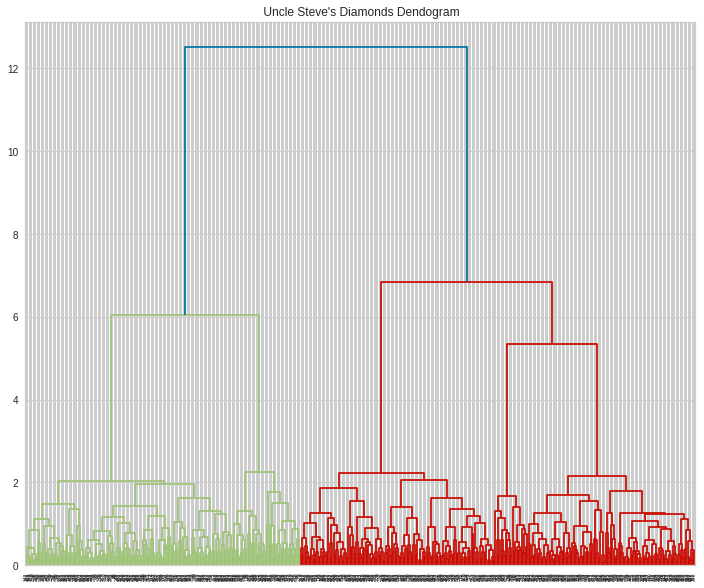

In [59]:
#Hierarchical 5: Setting up and running linkage. Method: complete which measures distance between farthest points on clusters .Metric is the distance measure and we are using Cityblock/ Manhattan.
from scipy.cluster.hierarchy import linkage
h = linkage(X,method="complete",metric="cityblock")

#plot a dendrogram. This helps to visualise the different, potential (possible) clusters.
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(12,10));
plt.title(" Uncle Steve's Diamonds Dendogram");  
dendrogram(h);

In [60]:
#Build Clusters(#5)
labels = fcluster(h, 5, criterion="maxclust")

df = df1.copy()
df["Cluster"] = labels
#X["Cluster"] = labels
#Cluster Means

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)


means = np.zeros((5, df.shape[1]))
#Means for each cluster
for i, label in enumerate(set(labels)):
    means[i,:] = df[df["Cluster"]==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, df[df["Cluster"]==label].count()[0]))
    print(means[i,:4])
print("\n\n")
means


Cluster 1 (n=157):
[   59.96 72448.06     0.77  6889.97]

Cluster 2 (n=50):
[    24.18 128029.12      0.9    4087.52]

Cluster 3 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster 4 (n=25):
[    86.   119944.04      0.07  14808.68]

Cluster 5 (n=126):
[    32.78 105265.81      0.31  14962.78]





array([[    59.96,  72448.06,      0.77,   6889.97,      1.  ],
       [    24.18, 128029.12,      0.9 ,   4087.52,      2.  ],
       [    87.78,  27866.1 ,      0.33,  16659.26,      3.  ],
       [    86.  , 119944.04,      0.07,  14808.68,      4.  ],
       [    32.78, 105265.81,      0.31,  14962.78,      5.  ]])

<Figure size 576x396 with 0 Axes>

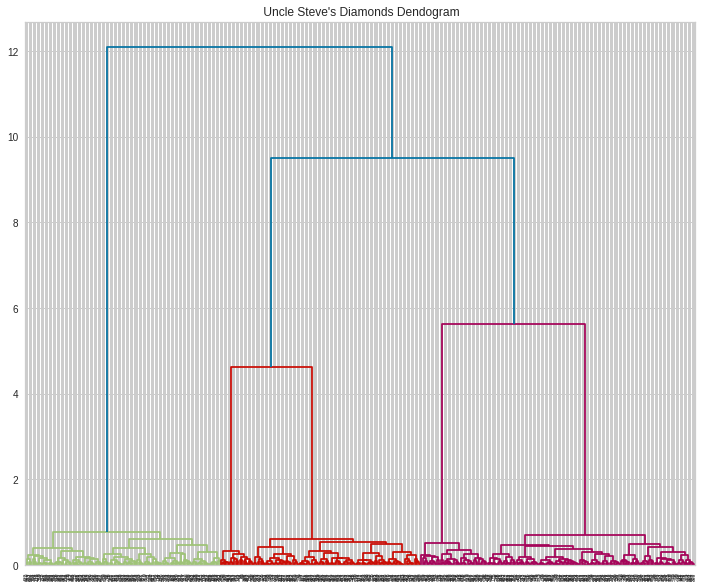

In [61]:
# Hierarchical 6: Setting up and running linkage. Method: ward which minimizes Ward variance .Metric is the distance measure and we are using euclidean.
from scipy.cluster.hierarchy import linkage
h = linkage(Y,method="ward",metric="euclidean")

#plot a dendrogram. This helps to visualise the different, potential (possible) clusters.
from scipy.cluster.hierarchy import dendrogram
plt.clf()
plt.figure(figsize=(12,10));
plt.title(" Uncle Steve's Diamonds Dendogram");  
dendrogram(h);

In [62]:
#Build Clusters(#5)
labels = fcluster(h, 5, criterion="maxclust")

df = df1.copy()
df["Cluster"] = labels
#X["Cluster"] = labels
#Cluster Means

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)


means = np.zeros((5, df.shape[1]))
#Means for each cluster
for i, label in enumerate(set(labels)):
    means[i,:] = df[df["Cluster"]==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, df[df["Cluster"]==label].count()[0]))
    print(means[i,:4])
print("\n\n")
means


Cluster 1 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster 2 (n=25):
[    86.   119944.04      0.07  14808.68]

Cluster 3 (n=126):
[    32.78 105265.81      0.31  14962.78]

Cluster 4 (n=50):
[    24.18 128029.12      0.9    4087.52]

Cluster 5 (n=157):
[   59.96 72448.06     0.77  6889.97]





array([[    87.78,  27866.1 ,      0.33,  16659.26,      1.  ],
       [    86.  , 119944.04,      0.07,  14808.68,      2.  ],
       [    32.78, 105265.81,      0.31,  14962.78,      3.  ],
       [    24.18, 128029.12,      0.9 ,   4087.52,      4.  ],
       [    59.96,  72448.06,      0.77,   6889.97,      5.  ]])

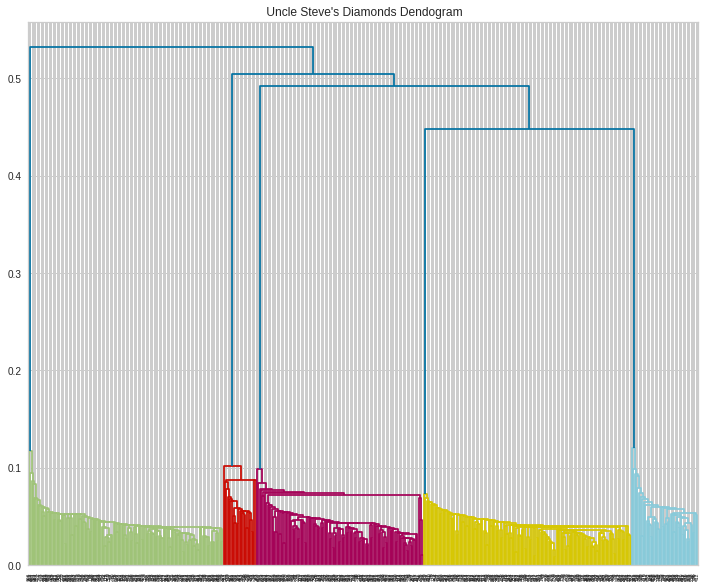

In [63]:
# Hierarchical 7: Setting up and running linkage. Method: single which measures distance between nearest points on clusters .Metric is the distance measure and we are using euclidean.
from scipy.cluster.hierarchy import linkage
h = linkage(Y,method="single",metric="euclidean")

#plot a dendrogram. This helps to visualise the different, potential (possible) clusters.
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(12,10));
plt.title(" Uncle Steve's Diamonds Dendogram");  
dendrogram(h);

In [64]:
#Build Clusters(#5)
labels = fcluster(h, 5, criterion="maxclust")

df = df1.copy()
df["Cluster"] = labels
#X["Cluster"] = labels
#Cluster Means

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)


means = np.zeros((5, df.shape[1]))
#Means for each cluster
for i, label in enumerate(set(labels)):
    means[i,:] = df[df["Cluster"]==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, df[df["Cluster"]==label].count()[0]))
    print(means[i,:4])
print("\n\n")
means


Cluster 1 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster 2 (n=25):
[    86.   119944.04      0.07  14808.68]

Cluster 3 (n=126):
[    32.78 105265.81      0.31  14962.78]

Cluster 4 (n=157):
[   59.96 72448.06     0.77  6889.97]

Cluster 5 (n=50):
[    24.18 128029.12      0.9    4087.52]





array([[    87.78,  27866.1 ,      0.33,  16659.26,      1.  ],
       [    86.  , 119944.04,      0.07,  14808.68,      2.  ],
       [    32.78, 105265.81,      0.31,  14962.78,      3.  ],
       [    59.96,  72448.06,      0.77,   6889.97,      4.  ],
       [    24.18, 128029.12,      0.9 ,   4087.52,      5.  ]])

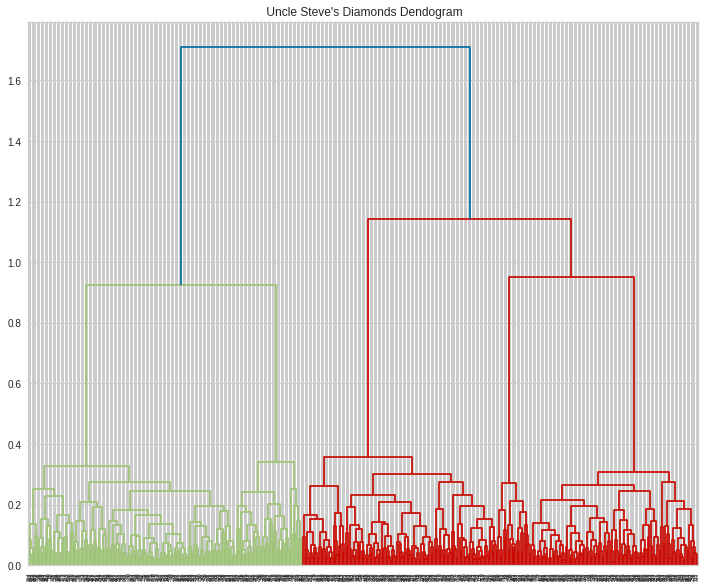

In [65]:
#Hierarchical 8: Setting up and running linkage. Method: complete which measures distance between farthest points on clusters .Metric is the distance measure and we are using euclidean.
from scipy.cluster.hierarchy import linkage
h = linkage(Y,method="complete",metric="euclidean")

#plot a dendrogram. This helps to visualise the different, potential (possible) clusters.
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(12,10));
plt.title(" Uncle Steve's Diamonds Dendogram");  
dendrogram(h);

In [66]:
#Build Clusters(#5)
labels = fcluster(h, 5, criterion="maxclust")

df = df1.copy()
df["Cluster"] = labels
#X["Cluster"] = labels
#Cluster Means

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)


means = np.zeros((5, df.shape[1]))
#Means for each cluster
for i, label in enumerate(set(labels)):
    means[i,:] = df[df["Cluster"]==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, df[df["Cluster"]==label].count()[0]))
    print(means[i,:4])
print("\n\n")
means


Cluster 1 (n=157):
[   59.96 72448.06     0.77  6889.97]

Cluster 2 (n=50):
[    24.18 128029.12      0.9    4087.52]

Cluster 3 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster 4 (n=25):
[    86.   119944.04      0.07  14808.68]

Cluster 5 (n=126):
[    32.78 105265.81      0.31  14962.78]





array([[    59.96,  72448.06,      0.77,   6889.97,      1.  ],
       [    24.18, 128029.12,      0.9 ,   4087.52,      2.  ],
       [    87.78,  27866.1 ,      0.33,  16659.26,      3.  ],
       [    86.  , 119944.04,      0.07,  14808.68,      4.  ],
       [    32.78, 105265.81,      0.31,  14962.78,      5.  ]])

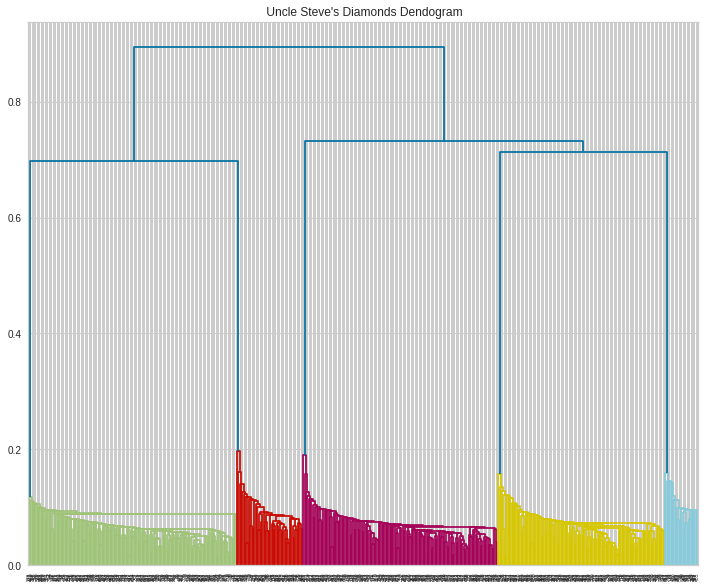

In [67]:
#Hierarchical 9: Setting up and running linkage. Method: single which measures distance between nearest points on clusters .Metric is the distance measure and we are using Cityblock/ Manhattan.
from scipy.cluster.hierarchy import linkage
h = linkage(Y,method="single",metric="cityblock")

#plot a dendrogram. This helps to visualise the different, potential (possible) clusters.
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(12,10));
plt.title(" Uncle Steve's Diamonds Dendogram");  
dendrogram(h);

In [68]:
#Build Clusters(#5)
labels = fcluster(h, 5, criterion="maxclust")

df = df1.copy()
df["Cluster"] = labels
#X["Cluster"] = labels
#Cluster Means

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)


means = np.zeros((5, df.shape[1]))
#Means for each cluster
for i, label in enumerate(set(labels)):
    means[i,:] = df[df["Cluster"]==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, df[df["Cluster"]==label].count()[0]))
    print(means[i,:4])
print("\n\n")
means


Cluster 1 (n=157):
[   59.96 72448.06     0.77  6889.97]

Cluster 2 (n=50):
[    24.18 128029.12      0.9    4087.52]

Cluster 3 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster 4 (n=126):
[    32.78 105265.81      0.31  14962.78]

Cluster 5 (n=25):
[    86.   119944.04      0.07  14808.68]





array([[    59.96,  72448.06,      0.77,   6889.97,      1.  ],
       [    24.18, 128029.12,      0.9 ,   4087.52,      2.  ],
       [    87.78,  27866.1 ,      0.33,  16659.26,      3.  ],
       [    32.78, 105265.81,      0.31,  14962.78,      4.  ],
       [    86.  , 119944.04,      0.07,  14808.68,      5.  ]])

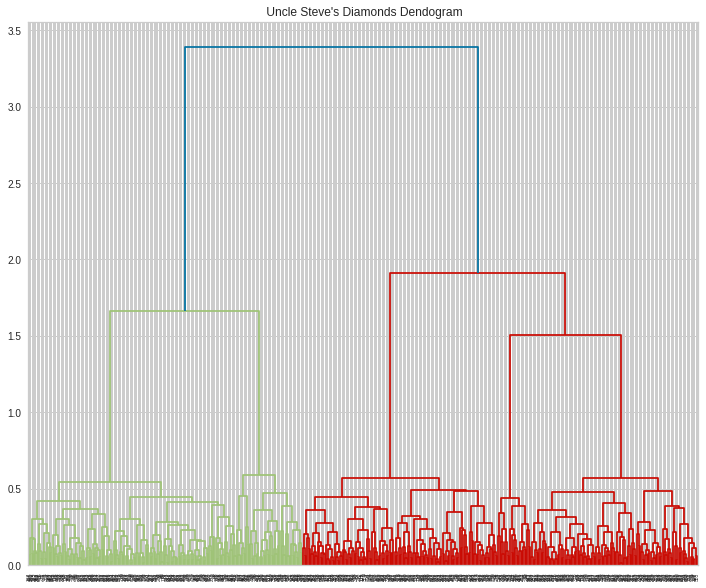

In [69]:
#Hierarchical 10: Setting up and running linkage. Method: complete which measures distance between farthest points on clusters .Metric is the distance measure and we are using Cityblock/ Manhattan.
from scipy.cluster.hierarchy import linkage
h = linkage(Y,method="complete",metric="cityblock")

#plot a dendrogram. This helps to visualise the different, potential (possible) clusters.
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(12,10));
plt.title(" Uncle Steve's Diamonds Dendogram");  
dendrogram(h);

In [70]:
#Build Clusters(#5)
labels = fcluster(h, 5, criterion="maxclust")

df = df1.copy()
df["Cluster"] = labels
#X["Cluster"] = labels
#Cluster Means

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)


means = np.zeros((5, df.shape[1]))
#Means for each cluster
for i, label in enumerate(set(labels)):
    means[i,:] = df[df["Cluster"]==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, df[df["Cluster"]==label].count()[0]))
    print(means[i,:4])
print("\n\n")
means


Cluster 1 (n=157):
[   59.96 72448.06     0.77  6889.97]

Cluster 2 (n=50):
[    24.18 128029.12      0.9    4087.52]

Cluster 3 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster 4 (n=25):
[    86.   119944.04      0.07  14808.68]

Cluster 5 (n=126):
[    32.78 105265.81      0.31  14962.78]





array([[    59.96,  72448.06,      0.77,   6889.97,      1.  ],
       [    24.18, 128029.12,      0.9 ,   4087.52,      2.  ],
       [    87.78,  27866.1 ,      0.33,  16659.26,      3.  ],
       [    86.  , 119944.04,      0.07,  14808.68,      4.  ],
       [    32.78, 105265.81,      0.31,  14962.78,      5.  ]])

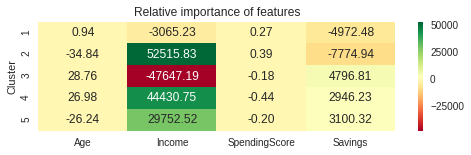

In [71]:
#Relative Importance Plot

import seaborn as sns

cluster_avg = df.groupby(['Cluster']).mean()
population_avg = df.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(8, 2));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');
plt.savefig('outmall-kmeans-5-importance.png', transparent=False);

I ran 10 different Hierarchical Clustering algorithms varying the scaling between MinMaxScaler and StandardScaler, varying the distance metric between Euclidean and Cityblock/ Manhattan and varying the linkage method between ward, single and complete. All the 10 configuration were clustered in to 5 cluster and yielded the same cluster (with means).

## 1.3 Model Comparison

Comparison between KMeans and Hierarchical Clustering:

*  Clustering Speed: KMeans is faster than Hierarchical Clustering. KMeans took about 0.2559 sec for clustering and 1.559 sec for hyper parameter tunning whereas Hierarchical took about 14.73 secs.

*  Distance Metric Supported: KMeans only supports only Euclidean distance metric whereas Hierarchical support multiple metrics.

* Hyperparameter: Hyperparameters for KMeans is decide the number of clusters that we want whereas in Hierarchical the hyperparamter is Linkage (how do we define distance between two joined clusters). In most problems we are trying to estimate K (number of clusters) and dont have that information available whereas Hierarchical doesnt suffer from the same constraint. The solution is Hyperparameter tunning for K by using elbow method (consider Silhouette score and WCSS).

* KMeans doesnt work well with hierarchy of clusters but the current dataset doesnt involve hierarchy of cluster.

* Prediction: KMeans support prediction of clusters for a test or unclustered dataset (with same features).

*Interpretation: Dendrogram offers a visualisation to see clusters whereas KMeans with more than 2-3 features can’t. Dendrogram also offers visualisation to map cluster (decide the number of clusters).

* Ease of Use: Hierarchical is easy to setup. 

I will recommend using Hierarchical as it is easy to use, Interpretabiity is high and doesnt require hyperparameter tunning. I do agree that KMeans is faster and offers prediction but the difference in speed is couple of seconds and we will run the clustering on a periodic basis so we may not even need the prediction functionanility. 





## 1.4 Personas

Analyse the means for Age, Income, Spending Score and Savings for each cluster to define the essence of the cluster

---

* Cluster {0}:

Age:              24.18

Income:           128,029 

Spending Score:   0.9

Savings:          4,087

Definition: Young Reckless and Affluent.

Characteristics: The age mean for the group is 24 years which signifies young people in the cluster. The mean income of the group is the highest amongst all clusters and they spend almost all of what they earn. As they have probably just started a year or two back thus the savings are low. Despite low savings they can still be a good customer for high end jwellery as they have high incomes.

---

* Cluster {1}:

Age:              59.96

Income:           72,448 

Spending Score:   0.77

Savings:          6,889

Definition: White Collar Baby Boomer.

Characteristics: The average age for the group is almost 60 years and have an average salary range around $72,000. They spend majority of what they earn (77%) and have singnificantly lower savings. This group will be concerned about their retirement savings and most likely would avoid unnecessary spending in the next 4-5 years. This group may not be a good target for expensive jwellery.

---

* Cluster {2}:

Age:              87.78

Income:           27,866 

Spending Score:   0.33

Savings:          16,659

Definition: Retired prudent but living their life.

Characteristics: The average age of the group is almost 88 years and probably work in a non-profit position or part time (as many hours as they want) to spend time post retirement. The group has the highest savings across all clusters. As they have low incomes, they are careful about spending their income or using their savings. They continue to build their saving pool by only spending 33% of their income thus prudent. They potentially could be good customers if targeted effectively.

---

* Cluster {3}:

Age:              86

Income:           119,944 

Spending Score:   0.07

Savings:          14,808

Definition: Old Age but not retired and Stingy.

Characteristics: The average age of the group is 86 years. Their income levels are high while they spend only a small percentage of their incomes. It is likely that they have already paid their mortgage. They probably retired with low savings or supporting their kids or paid out a big mortgage thus must continue to work demanding jobs (higher salary) to build saving fund. They might have to be lured into the store with promotions.

---

* Cluster {4}:

Age:              32.78

Income:           105,625 

Spending Score:   0.31

Savings:          14,963

Definition: Middle-Aged high-income savers.

Characteristics: The average age of the group is 33 years. The group seems to be entering junior level management by breaking into an average 6 figure income. The group is careful about their spending and probably saving up to buy a house. If they bought a house soon, they are likely to withdraw a substantial amount from their savings and their spending score would increase which will make them less attractive to the store. But over the years this could be a profitable customer segment.

---

      
       




# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

The rule {eggs} -> {bread} has high support and high confidence. {bread} and {eggs} are houshold staples thus a high percentage of customer buy them (and together). Customer buying {eggs} is likely to purchase {bread}, probably for breakfast or any other meal. Uncle Steve, most likely, would not find the rule interesting as these items are very common and he probably already noticed most of his customers buying these items together.



## 2.2: A rule that might have reasonably high support but low confidence.

he rule {Banana} -> {Chicken} has high support but low confidence. Most of the customers in the store buy {Banana} thus {Banana} support (or frequency in basket) is very high. {Chicken} being a food staple is also bought often (not as frequent as {banana}). Thus, customer purchase {banana} and {chicken} very frequently in a single transaction but if a customer bought {banana} the customer is not likely to buy {chicken} too (low confidence). Uncle Steve should not find the rule interesting as these items are correlated but are not explained by causality. The occurance of one doesnt impact sale of other.

## 2.3: A rule that might have low support and low confidence.

The rule {cakes} -> {medicine} has low support and low confidence. Customers don’t purchase {cakes} and {medicines} together, very often. Usually {cakes} are purchased during celebratory events like birthdays, promotions, etc whereas {medicines} are prescribed when unwell. Thus, customers who buy {cakes} are not likely to buy {medicines} (low confidence). Uncle Steve, most likely, would not find the rule interesting as these items not bought that often and the current analysis doesnt reveal if they are disassociating which might require stocking them far apart.

## 2.4: A rule that might have low support and high confidence.

The rule {flowers} -> {greeting cards} has low support and high confidence. {flowers} and {greeting cards} are part of very few transactions at the store as they are usually purchased for events like birthdays, marriages, someone in the hospital, etc. which are not common. Customers usually buy a {greeting card} when they buy {flowers}. Uncle Steve, most likely, would not find the rule interesting as these items are usually bought together (Most of the grocery chain or gift stores would stack them together) even though they are not purchased that often.


# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [72]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


## 3.1: Baseline model

In [73]:
pip install sklearn


In [74]:
!pip install pandas-profiling==2.7.1


In [75]:
pip install category_encoders


In [76]:
from pandas_profiling import ProfileReport

#EDA for training dataset
ProfileReport(X_train)

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]



1.   df_index: High cardinality. All are distinct values thus will not be a good feature for our model.

2.   UserID: High cardinality. All are distinct values thus will not be a good feature for our model.

3. Sex: This is a categorical feature which we can encode either using OneHotEncoding or TargetEncoding. Ideally we should not use Sex to classify Good or Bad credit for ethical reasons.

4. PreviousDefault: This is a categorical feature which we can encode either using OneHotEncoding or TargetEncoding.

5. FirstName and LastName: High cardinality. We will not use this feature for model development.

6. NumbetPets: This is a categorical (Ordinal) feature with 3 distinct values of 0, 1 and 2. It has seven distinct values.

7. ResidenceDuration and PreviousAccounts: Can use variables as is.

8. Street and LicensePlate: High cardinality feature. All distinct values thus we will ignore these features.

9. Amount: Amount of loan disbursed.

10. Married: This is a categorical feature which we can encode either using OneHotEncoding or TargetEncoding.

11. Duration: Tenure of the loan. This is a skewed dataset thus we will transform the data as feature engineering.

12. City and Purpose:This is a categorical feature which we can encode either using OneHotEncoding or TargetEncoding.

13. Date of Birth: High cardinality feature. We can feature engineer this as Age.

14. No missing values.

15. No high correlation between features.



In [77]:
ProfileReport(y_train)
#quick EDA for target feature

Summarize dataset:   0%|          | 0/14 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [78]:
#Feature Selection: Only selecting the features that are relevant for the baseline model 
#Removing features that are not relevant (High Caridinality)
X_train_base = X_train[["Sex","PreviousDefault","NumberPets","PreviousAccounts","ResidenceDuration","Amount","Married","Duration","City","Purpose"]]
X_train_base.head()



Sex  PreviousDefault  NumberPets  PreviousAccounts  ResidenceDuration  \
3897   M                0           2                 0                  2   
5628   F                0           0                 2                  2   
1756   F                0           2                 0                  3   
2346   F                0           2                 1                  2   
2996   M                0           0                 1                  3   

      Amount  Married  Duration              City    Purpose  
3897    3329        0        12    New Roberttown  Household  
5628    2996        0        36         Ericmouth  Household  
1756    2470        0        24         East Jill     NewCar  
2346    3745        0        30        Lake Debra    UsedCar  
2996    3549        0        36  North Judithbury   Vacation

In [79]:
#OneHotEncoder for Sex, City and Purpose. Selecting these columns to X_train_base_cat DataFrame
X_train_base_cat = X_train_base[["Sex","City","Purpose"]]


In [80]:
#Removing Sex, Purpose and City from train dataset.
X_train_base = X_train_base.iloc[:,1:8]


In [81]:
# #Encoding Sex, City and Purpose as One Hot Encoding

from sklearn.preprocessing import OneHotEncoder

OHEencoder = OneHotEncoder(handle_unknown='ignore')
X_train_base_cat_1hot = pd.DataFrame(OHEencoder.fit_transform(X_train_base_cat).toarray())
X_train_base_cat_1hot.columns = OHEencoder.get_feature_names()

X_train_base = X_train_base.reset_index()

# Join the One Hot Encoding dataframe back to training data
X_train_base = X_train_base.join(X_train_base_cat_1hot)





In [82]:
#Set the index back
X_train_base = X_train_base.set_index("index")


In [83]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#Decision Tree model
#Imbalance dataset: use class_weight as Balanced
#set hyperparamters
clf_cv = DecisionTreeClassifier(random_state=10, criterion="entropy",class_weight = "balanced",
                             min_samples_split=10, min_samples_leaf=10, max_depth=3, max_leaf_nodes=5)

#10 fold cross validation
#scoring metric: ROC AUC.  
scores = cross_val_score(clf_cv, X_train_base, y_train, cv=10, scoring='roc_auc')

#print the mean for 10 fold cross validation
print("the mean for 10 fold cross validation is {}".format(scores.mean()))

the mean for 10 fold cross validation is 0.8354576466423351


## 3.2: Feature engineering

In [84]:
#Removing features that are not relevant (High Caridinality)
X_train_base = X_train
X_train_base.head()




UserID Sex  PreviousDefault FirstName LastName  NumberPets  \
3897  236-22-6766   M                0     Jerry    Black           2   
5628  766-20-5986   F                0     Julia    Jones           0   
1756  744-25-5747   F                0   Abigail  Estrada           2   
2346  463-78-3098   F                0   Jessica    Jones           2   
2996  414-44-6527   M                0   William  Shaffer           0   

      PreviousAccounts  ResidenceDuration                Street LicensePlate  \
3897                 0                  2       0466 Brown Wall      3-U8282   
5628                 2                  2  6095 Larson Causeway      LWO 912   
1756                 0                  3    293 Michael Divide      715 OQT   
2346                 1                  2  02759 Williams Roads      869 SYK   
2996                 1                  3      19797 Turner Rue      48-A601   

      Amount  Married  Duration              City    Purpose DateOfBirth  
3897    3329        0        12    New Roberttown  Household  1970-04-22  
5628    2996        0        36         Ericmouth  Household  1964-06-19  
1756    2470        0        24         East Jill     NewCar  1975-02-17  
2346    3745        0        30        Lake Debra    UsedCar  1977-02-16  
2996    3549        0        36  North Judithbury   Vacation  1976-07-27

In [85]:
y_train = pd.DataFrame(y_train)


In [86]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.
# Feature Engg 1 - Target Encoder for Sex, Purpose, City, Married and NumberofPets
import category_encoders as ce

encoder = ce.TargetEncoder(cols=["Sex","Purpose","City","Married","NumberPets"],return_df=True)
encoder.fit(X_train_base,y_train["BadCredit"])
X_train_base = encoder.transform(X_train_base,y_train["BadCredit"])
X_train_base.head()



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TargetEncoder(cols=['Sex', 'Purpose', 'City', 'Married', 'NumberPets'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=1.0, verbose=0)

UserID       Sex  PreviousDefault FirstName LastName  NumberPets  \
3897  236-22-6766  0.178523                0     Jerry    Black    0.171913   
5628  766-20-5986  0.168664                0     Julia    Jones    0.172036   
1756  744-25-5747  0.168664                0   Abigail  Estrada    0.171913   
2346  463-78-3098  0.168664                0   Jessica    Jones    0.171913   
2996  414-44-6527  0.178523                0   William  Shaffer    0.172036   

      PreviousAccounts  ResidenceDuration                Street LicensePlate  \
3897                 0                  2       0466 Brown Wall      3-U8282   
5628                 2                  2  6095 Larson Causeway      LWO 912   
1756                 0                  3    293 Michael Divide      715 OQT   
2346                 1                  2  02759 Williams Roads      869 SYK   
2996                 1                  3      19797 Turner Rue      48-A601   

      Amount   Married  Duration      City   Purpose DateOfBirth  
3897    3329  0.190396        12  0.162741  0.146444  1970-04-22  
5628    2996  0.190396        36  0.193548  0.146444  1964-06-19  
1756    2470  0.190396        24  0.176380  0.182131  1975-02-17  
2346    3745  0.190396        30  0.151079  0.169691  1977-02-16  
2996    3549  0.190396        36  0.171342  0.154286  1976-07-27

In [87]:
#Function to calculate Age from Date of brith (Stack overflow)
from datetime import date, datetime

def calculate_age(born):
    today = date.today()
    born = datetime.strptime(born, "%Y-%m-%d").date()
    try: 
        birthday = born.replace(year=today.year)
    except ValueError: # raised when birth date is February 29 and the current year is not a leap year
        birthday = born.replace(year=today.year, month=born.month+1, day=1)
    if birthday > today:
        return today.year - born.year - 1
    else:
        return today.year - born.year

In [88]:
#Feature Engg 2: Calculate Age from Date of Birth
X_train_base["Age"] = X_train_base["DateOfBirth"].apply(calculate_age)


In [89]:
#Feature Engg 3: Duration is skewed thus applying log transformation
from sklearn.preprocessing import FunctionTransformer
scaler = FunctionTransformer(np.log,validate = True).fit(X_train_base[["Duration"]])
X_train_base["Duration_log"] = scaler.transform(X_train_base[["Duration"]])
X_train_base.head()

UserID       Sex  PreviousDefault FirstName LastName  NumberPets  \
3897  236-22-6766  0.178523                0     Jerry    Black    0.171913   
5628  766-20-5986  0.168664                0     Julia    Jones    0.172036   
1756  744-25-5747  0.168664                0   Abigail  Estrada    0.171913   
2346  463-78-3098  0.168664                0   Jessica    Jones    0.171913   
2996  414-44-6527  0.178523                0   William  Shaffer    0.172036   

      PreviousAccounts  ResidenceDuration                Street LicensePlate  \
3897                 0                  2       0466 Brown Wall      3-U8282   
5628                 2                  2  6095 Larson Causeway      LWO 912   
1756                 0                  3    293 Michael Divide      715 OQT   
2346                 1                  2  02759 Williams Roads      869 SYK   
2996                 1                  3      19797 Turner Rue      48-A601   

      Amount   Married  Duration      City   Purpose DateOfBirth  Age  \
3897    3329  0.190396        12  0.162741  0.146444  1970-04-22   51   
5628    2996  0.190396        36  0.193548  0.146444  1964-06-19   57   
1756    2470  0.190396        24  0.176380  0.182131  1975-02-17   46   
2346    3745  0.190396        30  0.151079  0.169691  1977-02-16   44   
2996    3549  0.190396        36  0.171342  0.154286  1976-07-27   45   

      Duration_log  
3897      2.484907  
5628      3.583519  
1756      3.178054  
2346      3.401197  
2996      3.583519

In [90]:
#Remove variables that are not relevant
X_train_base = X_train_base[["Sex","PreviousDefault","NumberPets","PreviousAccounts","ResidenceDuration","Amount","Married","City","Purpose","Age","Duration_log"]]
X_train_base.head()

Sex  PreviousDefault  NumberPets  PreviousAccounts  \
3897  0.178523                0    0.171913                 0   
5628  0.168664                0    0.172036                 2   
1756  0.168664                0    0.171913                 0   
2346  0.168664                0    0.171913                 1   
2996  0.178523                0    0.172036                 1   

      ResidenceDuration  Amount   Married      City   Purpose  Age  \
3897                  2    3329  0.190396  0.162741  0.146444   51   
5628                  2    2996  0.190396  0.193548  0.146444   57   
1756                  3    2470  0.190396  0.176380  0.182131   46   
2346                  2    3745  0.190396  0.151079  0.169691   44   
2996                  3    3549  0.190396  0.171342  0.154286   45   

      Duration_log  
3897      2.484907  
5628      3.583519  
1756      3.178054  
2346      3.401197  
2996      3.583519

In [91]:
#Re-train the model with new features
clf_cv = DecisionTreeClassifier(random_state=10, criterion="entropy",class_weight = "balanced",
                             min_samples_split=10, min_samples_leaf=10, max_depth=3, max_leaf_nodes=5)
#10 fold cross validation
#scoring metric: ROC AUC.  
scores = cross_val_score(clf_cv, X_train_base, y_train["BadCredit"], cv=10, scoring='roc_auc')

#print the mean for 10 fold cross validation
print("the mean for 10 fold cross validation is {}".format(scores.mean()))

the mean for 10 fold cross validation is 0.8786570972455214




1.   Baseline Model ROC AUC: 0.8354576466423351

2.   Feature Engineering (Re-train Model) ROC AUC: 0.8804512162519791

3. The model accuracy (ROC AUC) will improve by 0.449



## 3.3: Feature selection

In [92]:
#Feature selector that removes all low-variance features.

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.1));
sel = sel.fit(X_train_base);

In [93]:
#Feature selection for training data
X_train_new = sel.transform(X_train_base)

#Number of features dropped from 11 to 5
X_train_new.shape


(4800, 5)

In [94]:
X_train_new = pd.DataFrame(X_train_new)
X_train_new.head()
#Features selecter are PreviousAccount, ResidenceDuration, Amount, Age and Duration_log

0    1       2     3         4
0  0.0  2.0  3329.0  51.0  2.484907
1  2.0  2.0  2996.0  57.0  3.583519
2  0.0  3.0  2470.0  46.0  3.178054
3  1.0  2.0  3745.0  44.0  3.401197
4  1.0  3.0  3549.0  45.0  3.583519

In [95]:
#Highlights the variance across features
sel.variances_

array([     0.  ,      0.02,      0.  ,      1.02,      1.95, 180794.38,
            0.  ,      0.  ,      0.  ,     35.21,      0.27])

In [96]:
#Re-train the model with selected features

clf_cv = DecisionTreeClassifier(random_state=10, criterion="entropy",class_weight = "balanced",
                             min_samples_split=10, min_samples_leaf=10, max_depth=3, max_leaf_nodes=5)
#10 fold cross validation
#scoring metric: ROC AUC.  
scores = cross_val_score(clf_cv, X_train_base, y_train["BadCredit"], cv=10, scoring='roc_auc')
#print the mean for 10 fold cross validation
print("the mean for 10 fold cross validation is {}".format(scores.mean()))

the mean for 10 fold cross validation is 0.8786570972455214


1.   Baseline Model ROC AUC: 0.8354576466423351

2.   Feature Engineering (Re-train Model) ROC AUC: 0.8804512162519791

3. Feature Selection (Variance Threshold) ROC AUC: 0.8804512162519791

4. The model accuracy (ROC AUC) improves by 0.449 overbaseline but no improvement over feature engineering model

## 3.4: Hyperparameter tuning

In [97]:
# Grid Search hyper-parameter tuning

from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=10)
#define various hyper-parameters for finding the best configuration
params = {'criterion': ('gini', 'entropy'), 
          'splitter': ('best', 'random'), 
          'class_weight': ('balanced',None), 
          'max_depth': [2, 3, 4, 5, 7, 10, 15, 20], 
          'max_leaf_nodes': [2,5,10,12,15],
          'min_samples_leaf': [1, 3, 5, 7, 10, 15],
          'max_features':[0.25, 0.5, 0.75, 1.0]}

search = GridSearchCV(clf, params, scoring='roc_auc', cv=10, verbose=1)
search = search.fit(X_train_new, y_train["BadCredit"])





 

Fitting 10 folds for each of 7680 candidates, totalling 76800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 76800 out of 76800 | elapsed:  8.5min finished


In [98]:
#Best grid search hyper-parameter tuning configuration
print("Best Parameters are: {} ".format(search.best_params_))
print("Best Estimator is: {} ".format(search.best_estimator_))
print("ROC AUC for best estimator is: {} ".format(search.best_score_))

Best Parameters are: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 1.0, 'max_leaf_nodes': 15, 'min_samples_leaf': 3, 'splitter': 'best'} 
Best Estimator is: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=1.0, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best') 
ROC AUC for best estimator is: 0.91522268178912 


1.   Baseline Model ROC AUC: 0.8354576466423351

2.   Feature Engineering (Re-train Model) ROC AUC: 0.8804512162519791

3. Feature Selection (Variance Threshold) ROC AUC: 0.8804512162519791

4. Hyper-paramter Tuning ROC AUC: 0.91522268178912  

5. The model accuracy (ROC AUC) improves by 0.0798 over baseline and by 0.0348 over feature engineering/ feature selection model

The above stated accuracy is for 10 fold cross validation but before we deploy the model we need to re-train the model on the entire training dataset and predict credit ratings for test dataset.

## 3.5: Performance estimation

In [99]:
#Setting up the data again

In [100]:
#Removing features that are not relevant (High Caridinality)
X_train_base = X_train
X_train_base.head()


UserID Sex  PreviousDefault FirstName LastName  NumberPets  \
3897  236-22-6766   M                0     Jerry    Black           2   
5628  766-20-5986   F                0     Julia    Jones           0   
1756  744-25-5747   F                0   Abigail  Estrada           2   
2346  463-78-3098   F                0   Jessica    Jones           2   
2996  414-44-6527   M                0   William  Shaffer           0   

      PreviousAccounts  ResidenceDuration                Street LicensePlate  \
3897                 0                  2       0466 Brown Wall      3-U8282   
5628                 2                  2  6095 Larson Causeway      LWO 912   
1756                 0                  3    293 Michael Divide      715 OQT   
2346                 1                  2  02759 Williams Roads      869 SYK   
2996                 1                  3      19797 Turner Rue      48-A601   

      Amount  Married  Duration              City    Purpose DateOfBirth  
3897    3329        0        12    New Roberttown  Household  1970-04-22  
5628    2996        0        36         Ericmouth  Household  1964-06-19  
1756    2470        0        24         East Jill     NewCar  1975-02-17  
2346    3745        0        30        Lake Debra    UsedCar  1977-02-16  
2996    3549        0        36  North Judithbury   Vacation  1976-07-27

In [101]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.
# Feature Engg 1 - Target Encoder for Sex, Purpose, City, Married and NumberofPets
X_train_base = encoder.transform(X_train_base,y_train["BadCredit"])
X_train_base.head()

UserID       Sex  PreviousDefault FirstName LastName  NumberPets  \
3897  236-22-6766  0.178523                0     Jerry    Black    0.171913   
5628  766-20-5986  0.168664                0     Julia    Jones    0.172036   
1756  744-25-5747  0.168664                0   Abigail  Estrada    0.171913   
2346  463-78-3098  0.168664                0   Jessica    Jones    0.171913   
2996  414-44-6527  0.178523                0   William  Shaffer    0.172036   

      PreviousAccounts  ResidenceDuration                Street LicensePlate  \
3897                 0                  2       0466 Brown Wall      3-U8282   
5628                 2                  2  6095 Larson Causeway      LWO 912   
1756                 0                  3    293 Michael Divide      715 OQT   
2346                 1                  2  02759 Williams Roads      869 SYK   
2996                 1                  3      19797 Turner Rue      48-A601   

      Amount   Married  Duration      City   Purpose DateOfBirth  
3897    3329  0.190396        12  0.162741  0.146444  1970-04-22  
5628    2996  0.190396        36  0.193548  0.146444  1964-06-19  
1756    2470  0.190396        24  0.176380  0.182131  1975-02-17  
2346    3745  0.190396        30  0.151079  0.169691  1977-02-16  
2996    3549  0.190396        36  0.171342  0.154286  1976-07-27

In [102]:
#Feature Engg 2: Calculate Age from Date of Birth
X_train_base["Age"] = X_train_base["DateOfBirth"].apply(calculate_age)

In [103]:
#Feature Engg 3: Duration is skewed thus applying log transformation

X_train_base["Duration_log"] = scaler.transform(X_train_base[["Duration"]])

In [104]:
#Remove variables that are not relevant
X_train_base = X_train_base[["Sex","PreviousDefault","NumberPets","PreviousAccounts","ResidenceDuration","Amount","Married","City","Purpose","Age","Duration_log"]]
X_train_base.head()

Sex  PreviousDefault  NumberPets  PreviousAccounts  \
3897  0.178523                0    0.171913                 0   
5628  0.168664                0    0.172036                 2   
1756  0.168664                0    0.171913                 0   
2346  0.168664                0    0.171913                 1   
2996  0.178523                0    0.172036                 1   

      ResidenceDuration  Amount   Married      City   Purpose  Age  \
3897                  2    3329  0.190396  0.162741  0.146444   51   
5628                  2    2996  0.190396  0.193548  0.146444   57   
1756                  3    2470  0.190396  0.176380  0.182131   46   
2346                  2    3745  0.190396  0.151079  0.169691   44   
2996                  3    3549  0.190396  0.171342  0.154286   45   

      Duration_log  
3897      2.484907  
5628      3.583519  
1756      3.178054  
2346      3.401197  
2996      3.583519

In [105]:
#Feature selection for training data
X_train_new = sel.transform(X_train_base)

#Number of features dropped from 11 to 5
X_train_new.shape

(4800, 5)

In [106]:
X_train_new = pd.DataFrame(X_train_new)
X_train_new.head()
#Features selecter are PreviousAccount, ResidenceDuration, Amount, Age and Duration_log

0    1       2     3         4
0  0.0  2.0  3329.0  51.0  2.484907
1  2.0  2.0  2996.0  57.0  3.583519
2  0.0  3.0  2470.0  46.0  3.178054
3  1.0  2.0  3745.0  44.0  3.401197
4  1.0  3.0  3549.0  45.0  3.583519

In [107]:
#WORKING ON TEST DATA - Transformations

In [108]:
#Removing features that are not relevant (High Caridinality) ---- CHECK IF WE NEED THIS
X_test_base = X_test
X_test_base.head()


UserID Sex  PreviousDefault FirstName    LastName  NumberPets  \
1782  435-05-4551   F                0     Tanya      Conner           1   
3917  541-06-3756   F                0     Tammy     Brennan           0   
221   680-68-0713   F                0    Joanna     Johnson           2   
2135  853-48-9552   M                0  Nicholas  Richardson           2   
5224  147-43-5023   F                0     Megan       Jones           2   

      PreviousAccounts  ResidenceDuration                             Street  \
1782                 1                  3         4508 Crystal Rue Suite 173   
3917                 0                  3     6932 Stevenson Falls Suite 044   
221                  2                  0                      833 Dunn Road   
2135                 1                  1  81683 Hernandez Mission Suite 210   
5224                 1                  1                     383 Wong Ferry   

     LicensePlate  Amount  Married  Duration              City  Purpose  \
1782      HCY 571    3773        0        36  North Judithbury   NewCar   
3917      52A TE2    3412        0        24      Lake Roberto  UsedCar   
221       EWW 069    4146        0        24      West Michael   NewCar   
2135     QPF-7410    3608        1        30    East Jessetown  UsedCar   
5224     V 896714    2947        1        24  North Judithbury   NewCar   

     DateOfBirth  
1782  1970-10-15  
3917  1963-09-01  
221   1970-12-19  
2135  1963-08-05  
5224  1978-05-11

In [109]:
#Feature Engg Transformation to test dataset
#TargetEncoding
X_test_base = encoder.transform(X_test_base)
X_test_base.head(5)

UserID       Sex  PreviousDefault FirstName    LastName  \
1782  435-05-4551  0.168664                0     Tanya      Conner   
3917  541-06-3756  0.168664                0     Tammy     Brennan   
221   680-68-0713  0.168664                0    Joanna     Johnson   
2135  853-48-9552  0.178523                0  Nicholas  Richardson   
5224  147-43-5023  0.168664                0     Megan       Jones   

      NumberPets  PreviousAccounts  ResidenceDuration  \
1782    0.171053                 1                  3   
3917    0.172036                 0                  3   
221     0.171913                 2                  0   
2135    0.171913                 1                  1   
5224    0.171913                 1                  1   

                                 Street LicensePlate  Amount   Married  \
1782         4508 Crystal Rue Suite 173      HCY 571    3773  0.190396   
3917     6932 Stevenson Falls Suite 044      52A TE2    3412  0.190396   
221                       833 Dunn Road      EWW 069    4146  0.190396   
2135  81683 Hernandez Mission Suite 210     QPF-7410    3608  0.153339   
5224                     383 Wong Ferry     V 896714    2947  0.153339   

      Duration      City   Purpose DateOfBirth  
1782        36  0.171342  0.182131  1970-10-15  
3917        24  0.189024  0.169691  1963-09-01  
221         24  0.156250  0.182131  1970-12-19  
2135        30  0.161290  0.169691  1963-08-05  
5224        24  0.171342  0.182131  1978-05-11

In [110]:
#Feature Engg 2: Calculate Age from Date of Birth
X_test_base["Age"] = X_test_base["DateOfBirth"].apply(calculate_age)


In [111]:
#Feature Engg 3: Duration is skewed thus applying log transformation
X_test_base["Duration_log"] = scaler.transform(X_test_base[["Duration"]])

In [112]:
#Remove variables that are not relevant

X_test_base = X_test_base[["Sex","PreviousDefault","NumberPets","PreviousAccounts","ResidenceDuration","Amount","Married","City","Purpose","Age","Duration_log"]]

In [113]:
#Feature selector that removes all low-variance features.
X_test_new = sel.transform(X_test_base)
X_test_new.shape

(1200, 5)

In [114]:
# Grid Search hyper-parameter tuning
from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score, f1_score, log_loss, roc_auc_score
#define various hyper-parameters for finding the best configuration
# params = {'criterion': ('gini', 'entropy'), 
#           'splitter': ('best', 'random'), 
#           'class_weight': ('balanced', None), 
#           'max_depth': [2, 3, 4, 5, 7, 10, 15, 20], 
#           'max_leaf_nodes': [1,2,5,10],
#           'min_samples_leaf': [1, 3, 5, 7, 10, 15],
#           'max_features':[0.25, 0.5, 0.75, 1.0]}

y_pred = search.predict(X_test_new)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.97      0.93       991
           1       0.77      0.51      0.61       209

    accuracy                           0.89      1200
   macro avg       0.84      0.74      0.77      1200
weighted avg       0.88      0.89      0.88      1200



In [115]:
#Model Performance
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred)))
print("ROC AUC = {:.2f}".format(roc_auc_score(y_test, y_pred)))

Accuracy = 0.89
Kappa = 0.55
F1 Score = 0.61
Log Loss = 3.89
ROC AUC = 0.74


ROC AUC is 0.74. This is substantially lower than our training cross validation ROC AUC of 0.91522. The model is overfitting and not generalising well. 
A thorough analysis of the features and feature importance plot may indicate features that leading to Target leakage.



# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



**Cost of No Preventive actions**:
1.   Uncle Steve is not performing any inspection or preventive maintenance thus all failures will incur a maintenance cost of \$20,000.

2.   The total number of turbines failed are 256.

Total cost of maintenance = $20,000 per turbine failure * 256 turbines failed
                              **= $ 5,120,000 or $5.12M**.

**Training a ML model to predict turbine failures**

Assuming turbine failure prediction is positive prediction and healthy turbine prediction is negative prediction.

1.   If ML model predict turbine likely to fail, an inspection at the cost of $500 will be performed to determine if the turbine needs a preventive maintenance.

2.   The preventive maintenance is performed at a cost of $2,000 for turbine will fail, as determined by the inspection. 

  The total maintenance cost for these turbines (needing preventive maintenance) would be \$500 for inspection and \$2,000 for maintenance = $2,500 (Cost of True Positives).

3. If the model doesnt identify a faulty turbine as likely to fail (thus would not undergo inspection), the turbine will fail, and Uncle Steve would incur a maintenance cost of $20,000 (Cost of False Negatives).

4. If the ML model predicts a healthy/ good turbine as likely to fail, Uncle Steve will have to incur inspection cost of $500 (Cost of False Positives).

5. Any good/ healthy turbine that the ML model predicts as healthy/ good Uncle Steve will not incur any cost ($0 for Cost of True Negatives).

The above helps us build a cost matrix for Uncle Steve's maintenance cost

**Maintenance Cost Matrix (MCM) for Uncle Steve's Wind Farm**

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | \$2,500 | \$20,000 |
| **Actual No Fail**   | \$500 | \$0 |

**Evaluating Models (Random Forest and RNN)**

1.   Compute the confusion matrix for both models (already provided in the problem).

2.   Calculate Uncle Steve's maintenance cost for both models.

3.   Element wise multiplication between the cost matrix and confusion matrix to determine the cost of each model.

***Evaluating Random Forest Models***

1. Confusion matrix for the random forest (RFCM)

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

Total maintenance cost of Random Forest Model = elementwise multiplication (RFCM and MCM) 

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | \$2,500 * 201 = \$502,500| \$20,000 * 55 = \$1,100,000|
| **Actual No Fail**   | \$500 * 50 = \$25,000 | \$0 * 255195 = \$0|

Total maintenance cost of Random Forest Model = \$1,627,500

Random Forest model will save $3,492,500 over the current practice (no preventive maintenance)

2. Confusion matrix for the RNN (RNNCM):

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |

Total maintenance cost of RNN Model = elementwise multiplication (RNNCM and MCM) 

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | \$2,500 * 226 = \$565,000| \$20,000 * 30 = \$600,000|
| **Actual No Fail**   | \$500 * 1200 = \$600,000 | \$0 * 254045 = \$0|

Total maintenance cost of RNN Model = \$1,765,500

RNN model will save $3,355,000 over the current practice (no preventive maintenance)

**Random Forest will incur the least maintenance expense thus would recommend Uncle Steve to select the model. The model may need re-evaluation at later date in case the performance of the model(s) or cost matrix change.**

